<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz vorbereiten - Dummies, Skalen


> Im ersten Schritt wird der Datensatz aus dem ersten Notebook unter dem Namen 'maindf' gespeichert. Hierfür muss der Datensatz "1_Cleansing_Join" aus dem vorherigen Notebook geladen werden. Wir hinterlegen die Datei in Google Drive, sodass wir auf sie ohne die csv jedes Mal in colab hochladen zu müssen, über `drive.mount` und den gespeicherten Pfad auf die csv zugreifen können.





In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1_Cleansing_Join.csv")
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & ML/Projekt/1_Cleansing_Join.csv')
#maindf = pd.read_csv('1_Cleansing_Join.csv')

Mounted at /content/drive



> Inhaltliche Überlegungen führen zu der Erkenntniss, dass die Spalten 'arrival_date','departure_date', 'night_index' und 'arrival_date_week_number' für den Input von Klassifikationsmodellen irrelevant sind. Wir löschen sie aus dem Dataframe.



In [ ]:
maindf = maindf.drop(columns=['arrival_date','departure_date', 'night_index', 'arrival_date_week_number'])



> Wir prüfen nochmals, ob wir fehlende Werte in den Spalten haben.



In [ ]:
maindf.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
city                              0
average_temperature               0
average_temp_min                  0
average_temp_max                  0
average_prcp                

> Im folgenden Schritt ändern wir alle binären Variablen auch zu solch einem Datentyp.

In [ ]:
maindf['is_canceled'] = maindf['is_canceled'].astype('uint8')
maindf['is_repeated_guest'] = maindf['is_repeated_guest'].astype('uint8')
maindf['holiday_flag'] = maindf['holiday_flag'].astype('uint8')
maindf['agent'] = maindf['agent'].astype('uint8')

> Nun müssen alle nicht ordinalen, kategoriellen Features (city, distribution_channel, deposit_type, customer_type) zu Dummy-Variablen umgebaut werden. Wir nutzen dafür One hot Encoding, entfernen die relevante Spalte und fügen die codierten Spalten durch horizontales Concartenieren hinzu.

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['city']),
    pd.get_dummies(maindf.city, drop_first=True, prefix='city'),
], axis=1)

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['distribution_channel']),
    pd.get_dummies(maindf.distribution_channel, drop_first=True, prefix='distribution_channel'),
], axis=1)

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['deposit_type']),
    pd.get_dummies(maindf.deposit_type, drop_first=True, prefix='deposit_type'),
], axis=1)

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['customer_type']),
    pd.get_dummies(maindf.customer_type, drop_first=True, prefix='customer_type'),
], axis=1)

> Wir checken das überschriebene Dataframe inklusive der umcodierten Spalten.

In [ ]:
maindf

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,...,city_Lisbon,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,1,0,0,0,2,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0,737,2015,July,1,0,0,0,2,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0,7,2015,July,1,0,1,1,1,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0,13,2015,July,1,0,1,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,July,1,0,2,2,2,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111409,0,23,2017,August,30,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0
111410,0,102,2017,August,31,2,5,7,3,0.0,...,1,0,0,1,0,0,0,0,1,0
111411,0,34,2017,August,31,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0
111412,0,109,2017,August,31,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0


> Das Feature `country` entpuppt sich als Problem, da hier über 175 Dummy-Variablen gebildet werden müssten.

In [ ]:
len(maindf.country.value_counts())

176

> Wir sehen aber bereits bei folgender Ansicht, dass sich die meisten Buchungen höchstwahrscheinlich auf einige wenige Länder fokussieren werden.

In [ ]:
maindf.country.value_counts()

PRT    43547
GBR    11278
FRA    10179
ESP     8287
DEU     7171
       ...  
VGB        1
BDI        1
PLW        1
BHS        1
CYM        1
Name: country, Length: 176, dtype: int64

> Mit der `groupby`-Funktion können wir die Buchungen inklusive aller weiteren Angaben nach Ländern gruppiert ausgeben und Details einsehen.

In [ ]:
maindf.groupby(['country']).sum()

<ipython-input-12-7a783e7a63f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maindf.groupby(['country']).sum()


,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,...,city_Lisbon,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
country,,,,,,,,,,,,,,,,,,,,,
ABW,0,252,4033,32,2,5,7,5,0.0,0,...,2,0,0,2,0,0,0,0,2,0
AGO,205,8349,709705,5415,823,2086,2909,557,77.0,5,...,328,144,0,206,0,0,0,2,325,18
AIA,0,0,2016,8,2,2,4,2,2.0,0,...,1,0,0,1,0,0,0,0,1,0
ALB,2,811,20162,159,10,26,36,19,0.0,1,...,7,2,0,8,0,0,0,0,7,3
AND,5,329,14116,103,9,22,31,15,4.0,0,...,2,1,0,6,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,1,109,2016,5,1,2,3,2,0.0,0,...,1,0,0,1,0,0,0,0,1,0
VNM,2,673,16131,152,5,16,21,17,0.0,0,...,6,0,0,8,0,0,0,0,7,1
ZAF,30,5409,157283,1249,71,160,231,140,17.0,0,...,60,15,0,63,0,0,0,1,70,7


> Wir geben eine Liste aller Länder mit ihrer dazugehörigen Anzahl an Buchungen aus. Wir sehen, dass relativ schnell schon keine vierstelligen Buchungsanzahlen mehr vorhanden sind. Daher werden alle Länder aus dem Datensatz entfernt, die n < 1000 Buchungen aufweisen. Dieser modifizierte Dataframe wird maindf_c genannt.

In [ ]:
country_counts = maindf['country'].value_counts()
country_names = country_counts.index.tolist()
counts = country_counts.tolist()

result = list(zip(country_names, counts))
print(result)

[('PRT', 43547), ('GBR', 11278), ('FRA', 10179), ('ESP', 8287), ('DEU', 7171), ('ITA', 3635), ('IRL', 3327), ('BEL', 2248), ('BRA', 2187), ('USA', 2048), ('NLD', 2020), ('CHE', 1703), ('CN', 1269), ('AUT', 1190), ('SWE', 1004), ('CHN', 981), ('POL', 884), ('ISR', 667), ('NOR', 593), ('RUS', 577), ('ROU', 494), ('FIN', 436), ('DNK', 421), ('AUS', 418), ('AGO', 352), ('LUX', 284), ('MAR', 237), ('TUR', 230), ('HUN', 229), ('ARG', 207), ('JPN', 187), ('CZE', 158), ('IND', 146), ('KOR', 128), ('GRC', 110), ('SRB', 100), ('DZA', 97), ('HRV', 88), ('IRN', 81), ('MEX', 80), ('EST', 79), ('ZAF', 78), ('LTU', 75), ('BGR', 74), ('NZL', 72), ('COL', 69), ('UKR', 68), ('MOZ', 66), ('CHL', 63), ('SVK', 61), ('THA', 59), ('ISL', 56), ('LVA', 53), ('SVN', 52), ('ARE', 50), ('TWN', 49), ('SAU', 48), ('PHL', 40), ('CYP', 40), ('TUN', 38), ('SGP', 38), ('IDN', 35), ('NGA', 33), ('EGY', 32), ('LBN', 30), ('HKG', 29), ('PER', 28), ('MYS', 28), ('URY', 27), ('ECU', 27), ('BLR', 26), ('CPV', 24), ('VEN', 24

In [ ]:
keep_countries = ['PRT', 'GBR', 'Fra', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'SWE']
maindf_c = maindf[maindf['country'].isin(keep_countries)]

> Mit folgenden 2 Zeilen sehen wir, dass gut 20000 Einträge durch diesen Schritt verloren gehen. Anschließend können jedoch Dummies gebildet werden und es sind anstatt 175 nur noch 14.

In [ ]:
len(maindf)

111414

In [ ]:
len(maindf_c)

90914

In [ ]:
maindf_c = pd.concat([
    maindf_c.drop(columns=['country']),
    pd.get_dummies(maindf_c.country, drop_first=True, prefix='country'),
], axis=1)

> Da der 'arrival_date_month' noch in einem String vorliegt, werden die Werte nun durch die Monatszahlen ausgetauscht um eine bessere Verarbeitung durch das spätere Modell zu gewährleisten.

In [ ]:
arrival_date_month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
maindf_c.arrival_date_month = maindf_c.arrival_date_month.apply(lambda x: arrival_date_month_mapping[x])

> Wir sehen, dass alle Features in dem gewünschten Datenformat vorliegen, nur children erklärt sich uns nicht ganz, da - rein logisch - hier die Daten in integer-Format sinnvoll scheinen.

In [ ]:
maindf_c.dtypes

is_canceled                         uint8
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
stay_nights_sum                     int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   uint8
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                               uint8
days_in_waiting_list                int64
adr                               float64
total_of_special_requests           int64
average_temperature               float64
average_temp_min                  float64
average_temp_max                  float64
average_prcp                      float64
holiday_flag                      

> Da, wie hier zu sehen lediglich integer-Werte in der 'children' Spalte vorhanden sind, wird das Datenformat auch zu diesem geändert.

In [ ]:
maindf_c.children.value_counts()

0.0     84487
1.0      3645
2.0      2732
3.0        49
10.0        1
Name: children, dtype: int64

In [ ]:
maindf_c['children'] = maindf_c['children'].astype('int64')

> Zudem werden zwei Dummies umbenannt, damit später keine Probleme durch deren Namen aufkommen. Bei beiden sind Satzzeichen vorhanden, mit denen Python in gewissen Codeausführungen nicht umgehen kann. Es wird das Leerzeichen sowie Slashs zu einem Unterstrichen geändert. Somit haben wir bei allen features einen zusammenhängenden string.

In [ ]:
maindf_c= maindf_c.rename(columns={'deposit_type_Non Refund': 'deposit_type_Non_Refund'})
maindf_c= maindf_c.rename(columns={'distribution_channel_TA/TO': 'distribution_channel_TA_TO'})

> Erneut checken wir unser aktuelles Dataframe durch Ausgabe der Missing Values über `isna()`.

In [ ]:
maindf_c.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
total_of_special_requests         0
average_temperature               0
average_temp_min                  0
average_temp_max                  0
average_prcp                      0
holiday_flag                      0
city_Lisbon                       0
distribution_channel_Direct       0
distribution_channel_GDS          0
distribution_channel_TA_TO  

> Wenn wir uns die durchschnittlichen Features, gruppiert nach den Ausprägungen unserer Zielvariablen anschauen, kann man schon erste kleine Ableitungen erkennen. Beispielsweise ist im Schnitt die Leadtime deutlich höher bei den Buchungen, welche gecancelt werden.

In [ ]:
maindf_c.groupby('is_canceled').mean()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,85.618231,2016.131418,6.565634,15.952558,0.970159,2.532400,3.502559,1.871863,0.106375,0.011528,...,0.019026,0.111586,0.114660,0.167201,0.046768,0.043206,0.030647,0.322462,0.014564,0.028998
1,154.392387,2016.127060,6.699561,15.688007,0.907866,2.527086,3.434953,1.909251,0.095594,0.004020,...,0.006762,0.032424,0.057767,0.062771,0.022148,0.035405,0.010249,0.701291,0.006043,0.013337


# Prüfung auf Multikollinearität

> Um Multikollinearität ausschließen zu können wird der VIF-Faktor für die Features berechnet.

> Wir definiren zuerst das Design Matrix und erstellen dann einen Data Frame mit den VIF-Werten. Dann berechnen wir den individuellen VIF-Wert jeder Variable und fügen ihn als Spalte hinzu.

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

yy, XX = dmatrices('is_canceled ~ lead_time+arrival_date_year+arrival_date_month+arrival_date_day_of_month+stays_in_weekend_nights+stays_in_week_nights+stay_nights_sum+adults+children+babies+is_repeated_guest+previous_cancellations+previous_bookings_not_canceled+booking_changes+agent+days_in_waiting_list+adr+total_of_special_requests+average_temperature+average_temp_min+average_temp_max+average_prcp+holiday_flag+city_Lisbon+distribution_channel_Direct+distribution_channel_GDS+distribution_channel_TA_TO+distribution_channel_Undefined+deposit_type_Non_Refund+deposit_type_Refundable+customer_type_Group+customer_type_Transient+customer_type_Transient-Party+country_BEL+country_BRA+country_CHE+country_CN+country_DEU+country_ESP+country_GBR+country_IRL+country_ITA+country_NLD+country_PRT+country_SWE+country_USA', data=maindf_c, return_type='dataframe')

vif_df = pd.DataFrame()
vif_df['variable'] = XX.columns

vif_df['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

print(vif_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: ignored

> Nun wird der VIF-Wert in ein anderes Format gebracht, um eine einfachere Interpretation zu gewährleisten. Vor allem die Features, welche die Temperatur abbilden, zeigen einen extrem hohen VIF-Wert, was auch vollkommen logisch ist. Sie sind stark voneinander abhängig. Darum wird entschieden für die Temperatur lediglich die 'average_temperature' zu behalten. Außerdem entschieden wir usn dazu, lediglich die 'stay_nights_sum' beizubehalten, da eine starke Abhängigkeit zu den nächten in der Woche und am Wochenende besteht. Inhaltlich geht kaum bis gar nichts verloren mit dem Löschen der zwei Variablen.

In [ ]:
def format_number(num):
    return "{:.8f}".format(num)

vif_df['VIF'] = vif_df['VIF'].apply(format_number)

print(vif_df)

In [ ]:
maindf_c = maindf_c.drop(columns=['average_temp_min', 'average_temp_max'])
maindf_c = maindf_c.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights'])

> An dieser Stelle wird der vorbereitete Datensatz nun als csv-Datei heruntergeladen, damit im nächsten Notebook für die Regression darauf zurückgegriffen werden kann.

In [ ]:
maindf_c.to_csv('2_Data_for_Modeltraining.csv', header=True, index=False)

# Skalieren und Explorieren des Datensatzes

> Zunächst wird der Datensatz skaliert, wobei die Zielvariable (der Cancellation-Status) ausgenommen wird.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
maindf_scaled = maindf_c.copy()
columns_to_scale = list(set(maindf_c.columns) - {'is_canceled'})
maindf_scaled[columns_to_scale] = scaler.fit_transform(maindf_c[columns_to_scale])

> Nun werden die Spalten in 'encoded'- und 'numerical'- columns eingeteilt, um sie im darauf folgenden Schritt zu visualisieren.

In [ ]:
encoded_columns = ['is_canceled','arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'agent', 'is_repeated_guest', 'holiday_flag', 'city_Lisbon', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_Undefined', 'distribution_channel_TA_TO', 'deposit_type_Non_Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party',
       'country_BEL', 'country_BRA', 'country_CHE', 'country_CN', 'country_DEU', 'country_ESP', 'country_GBR', 'country_IRL', 'country_ITA', 'country_NLD', 'country_PRT', 'country_SWE', 'country_USA']
numerical_columns = list(set(maindf_c.columns) - set(encoded_columns))

> Mit `plt` aus der matplot-library können wir nun Säulendiagramme zu den encoded Spalten erstellen, die die Häufigkeiten der Ausprägungen anzeigen.

<ipython-input-28-23c912c3a290>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


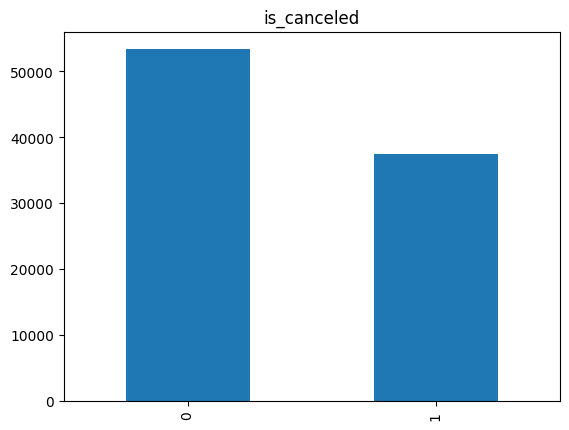

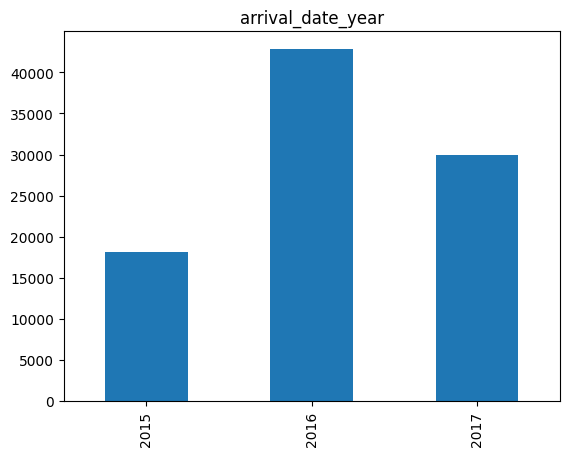

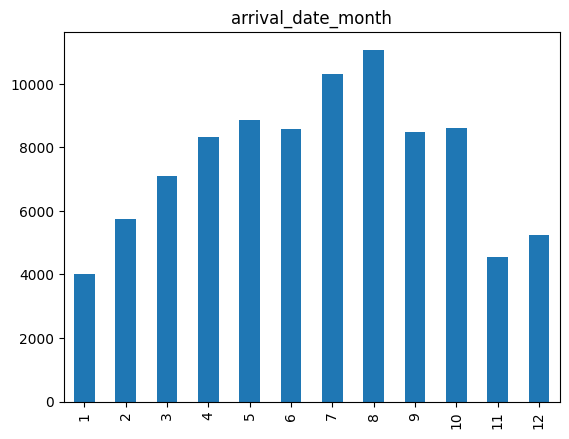

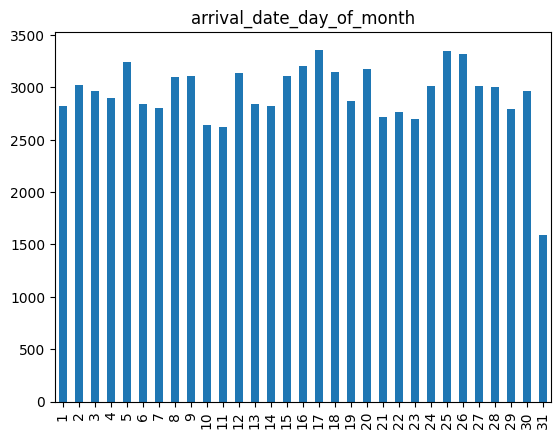

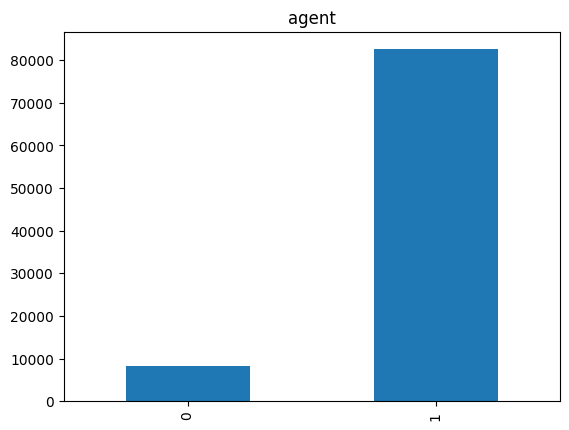

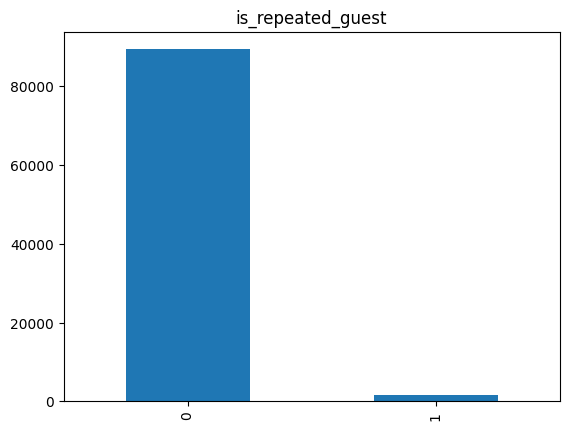

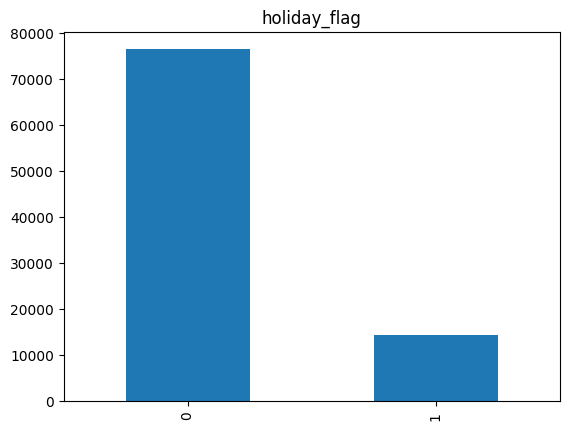

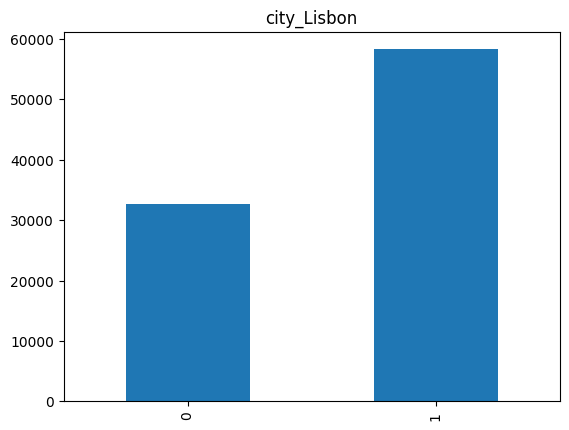

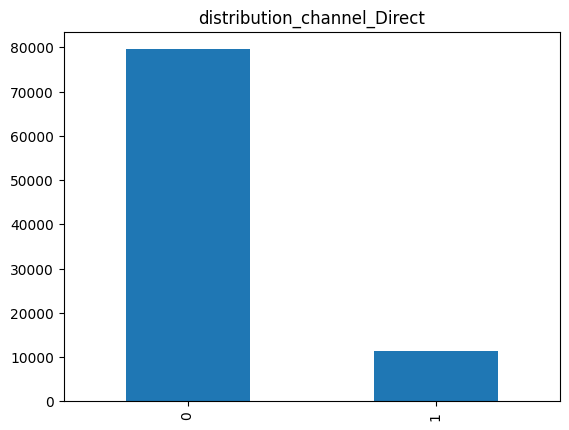

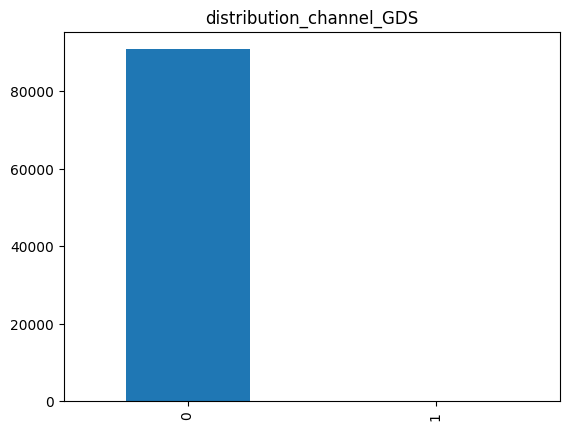

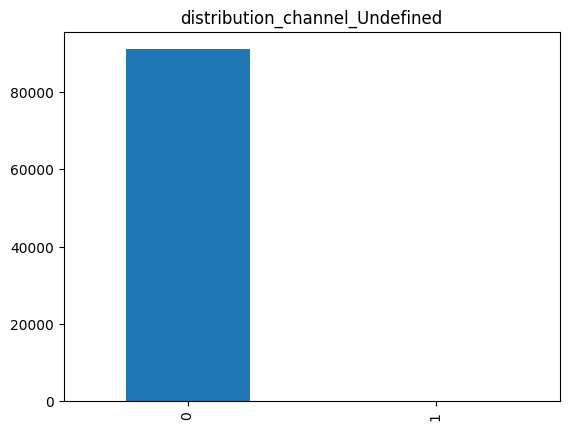

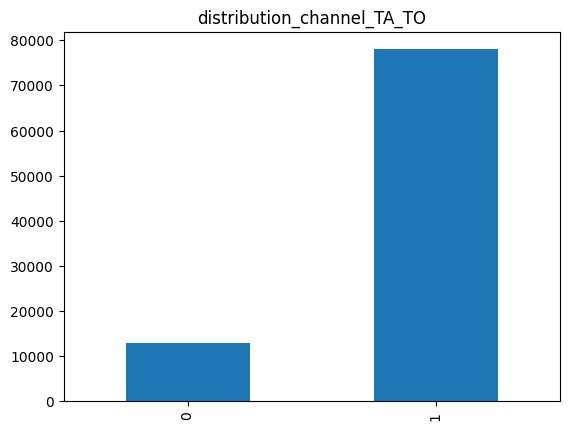

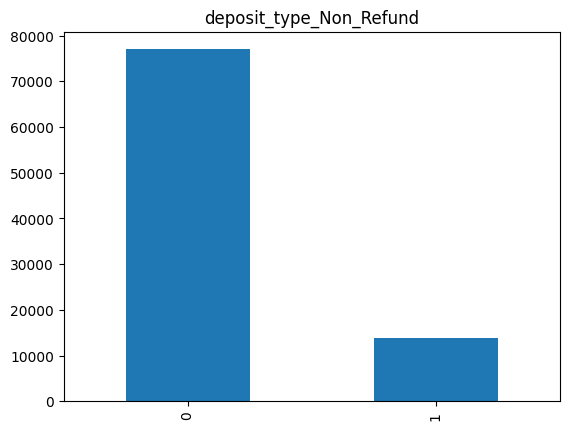

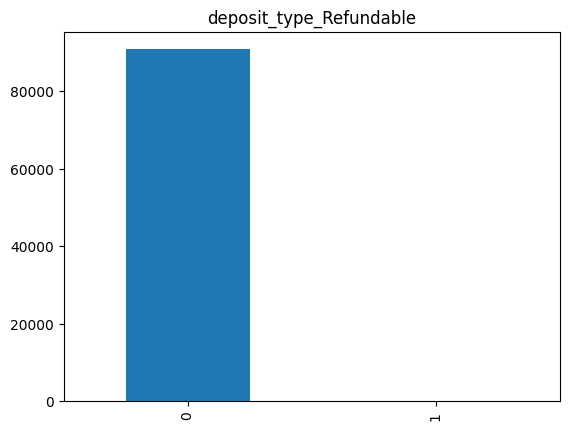

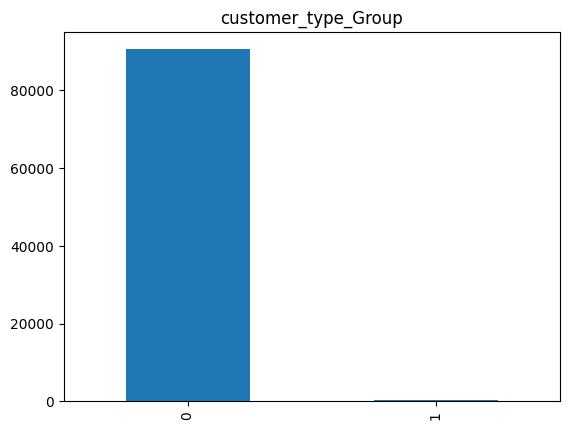

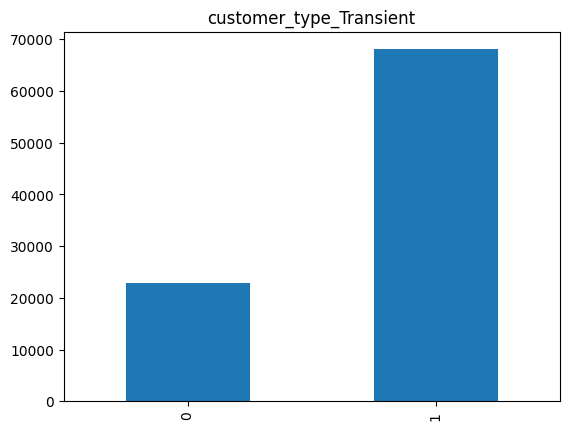

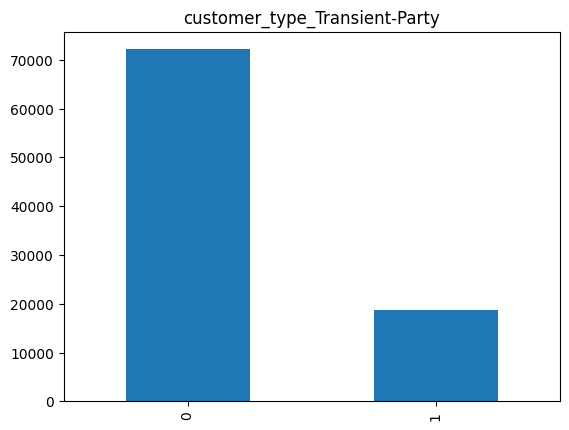

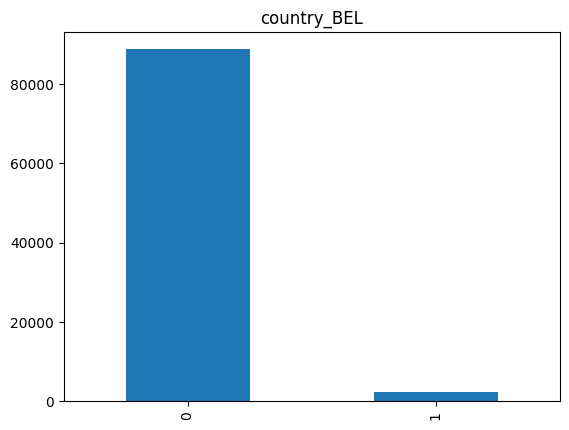

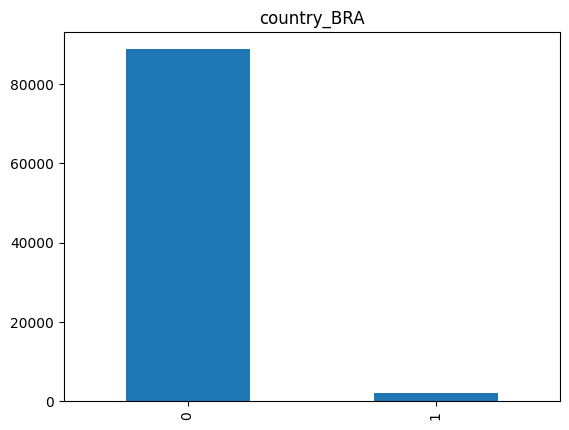

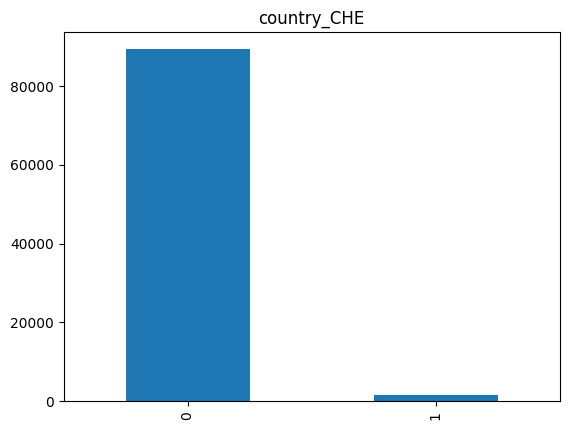

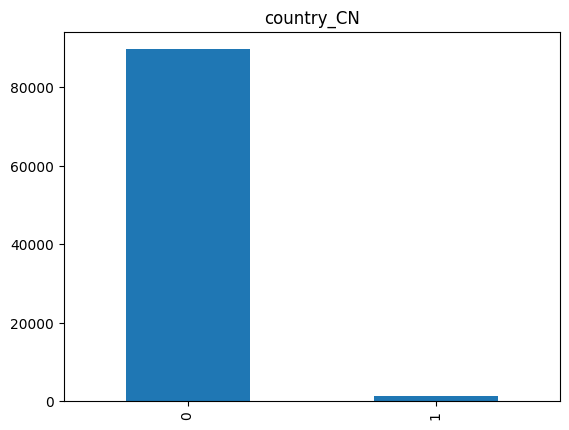

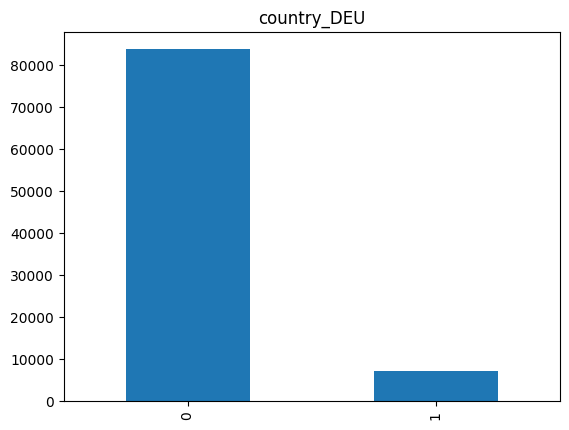

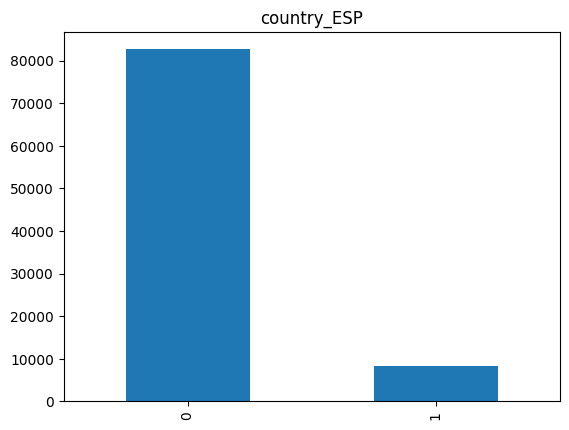

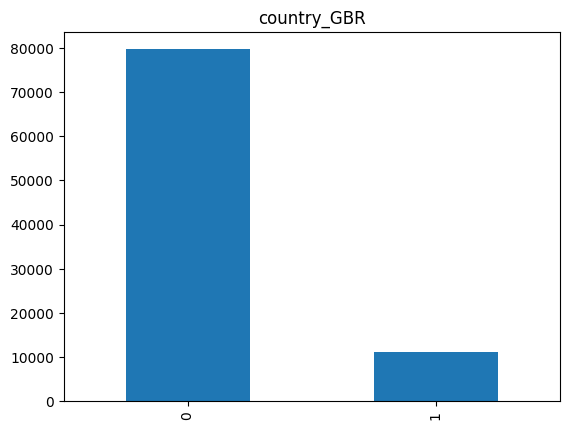

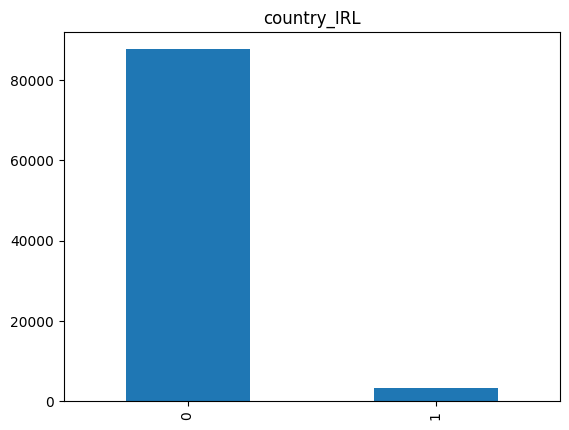

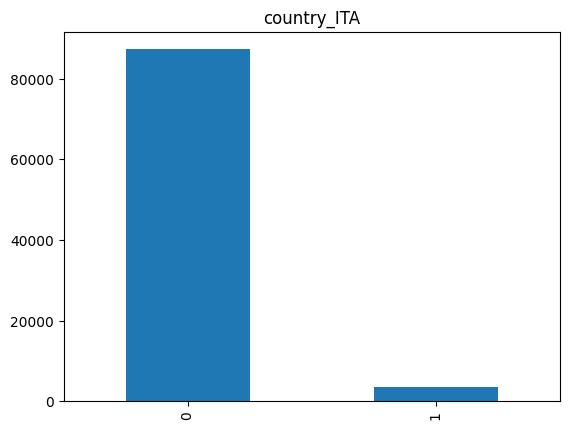

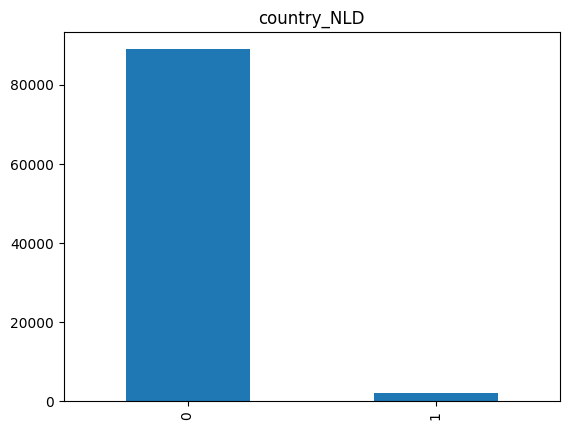

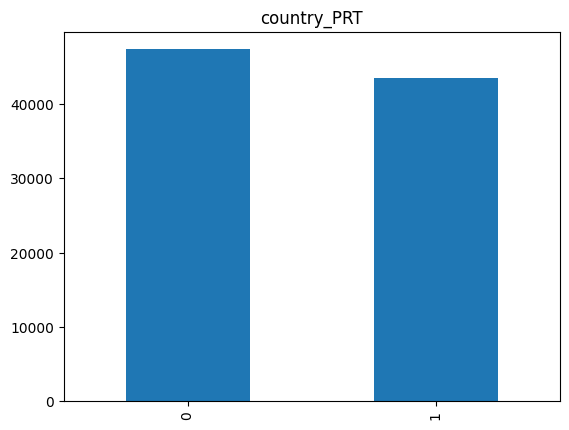

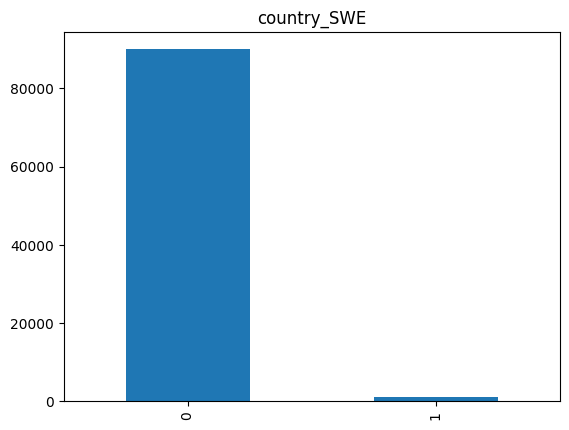

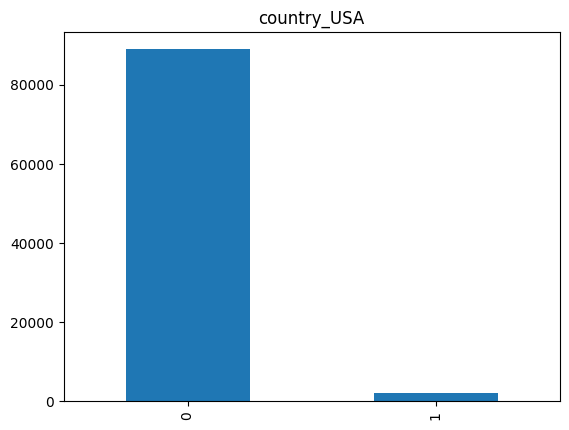

In [ ]:
import matplotlib.pyplot as plt
for column in encoded_columns:
  fig = plt.figure()
  maindf_c[column].value_counts(sort=False).sort_index().plot(kind='bar', title=column)

> Wir geben außerdem die numerischen Spalten als Histogramme aus.

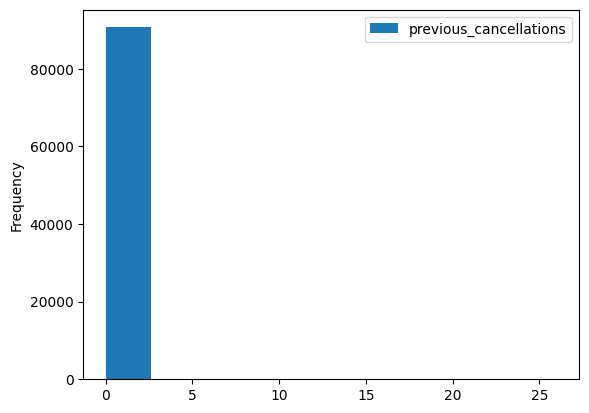

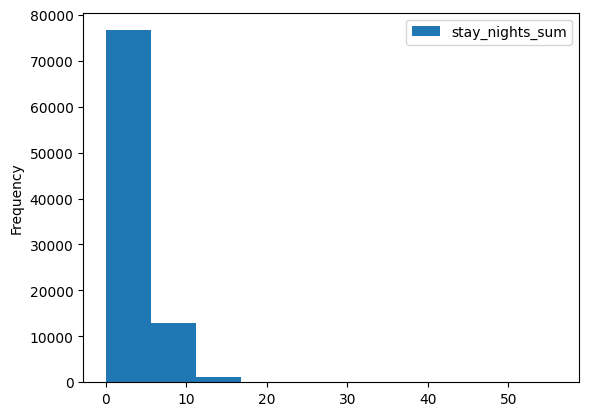

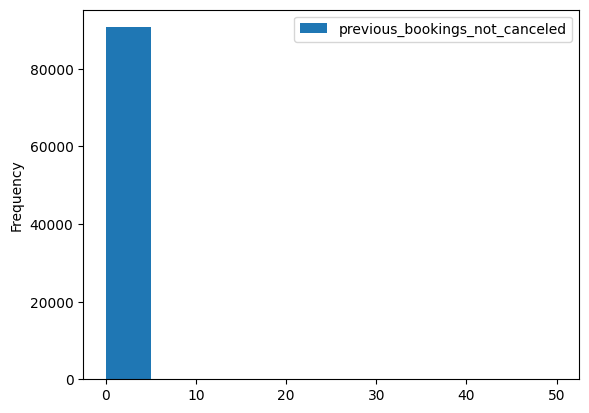

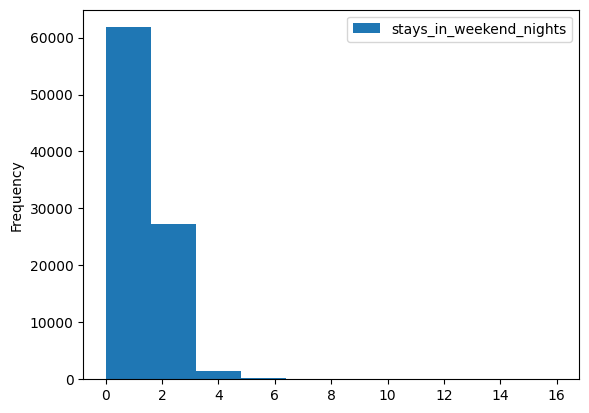

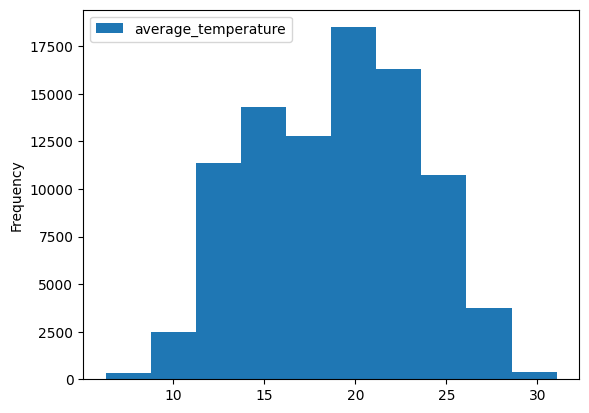

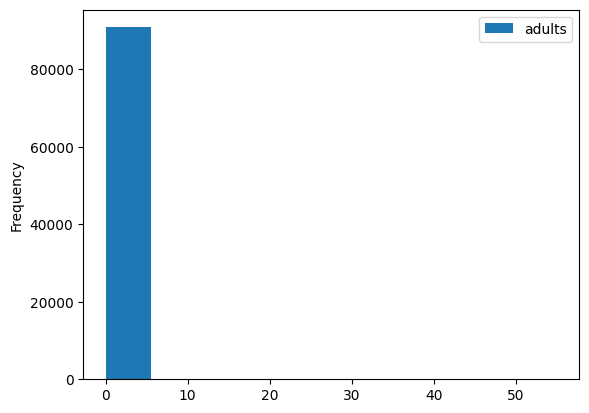

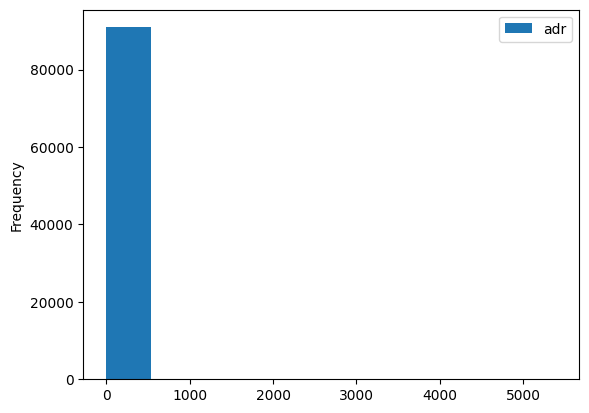

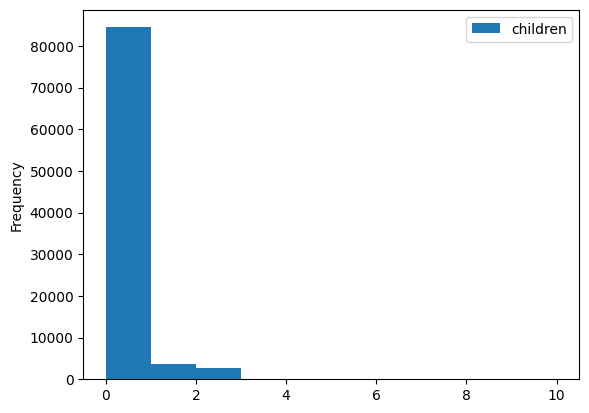

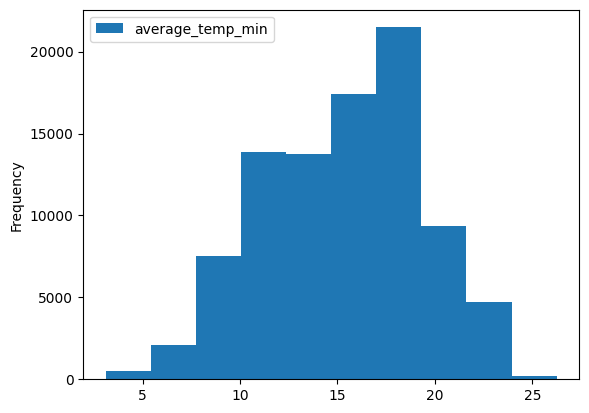

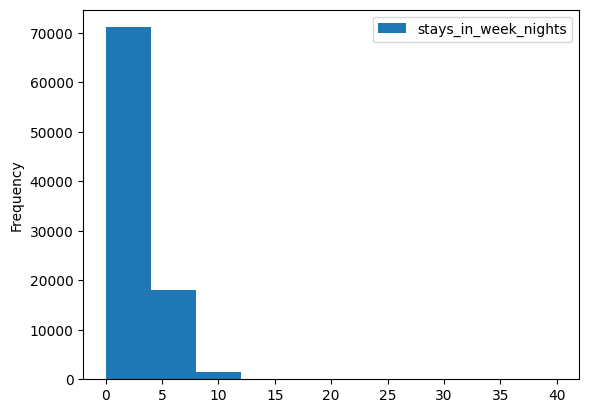

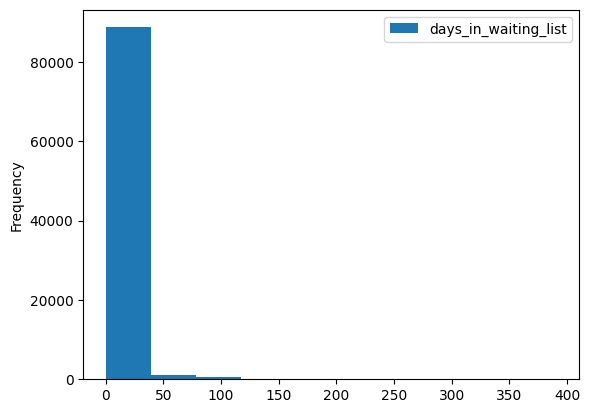

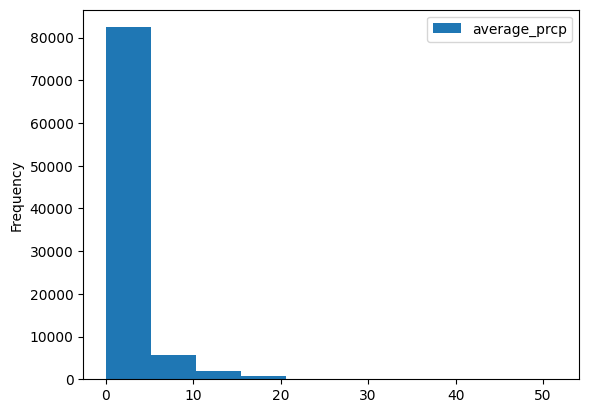

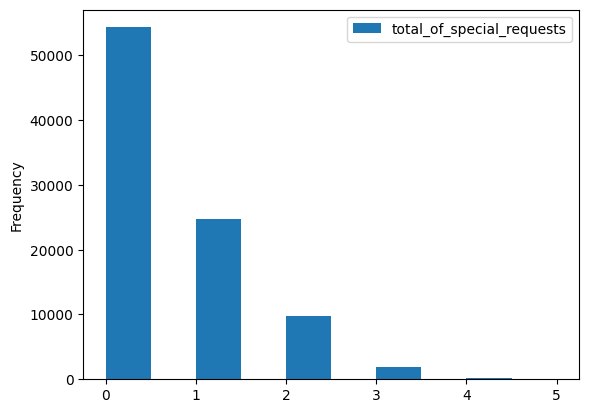

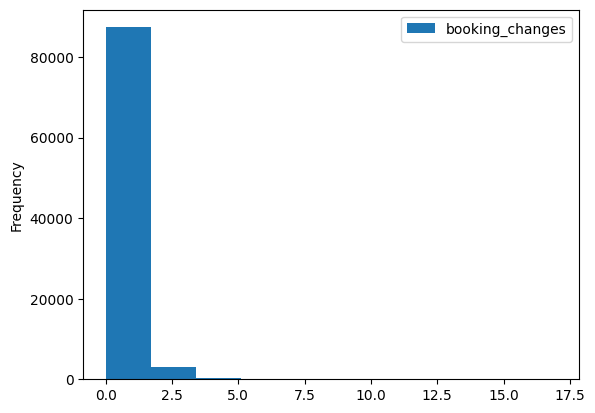

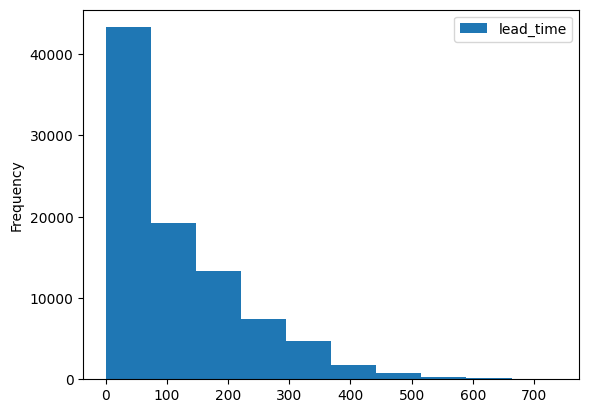

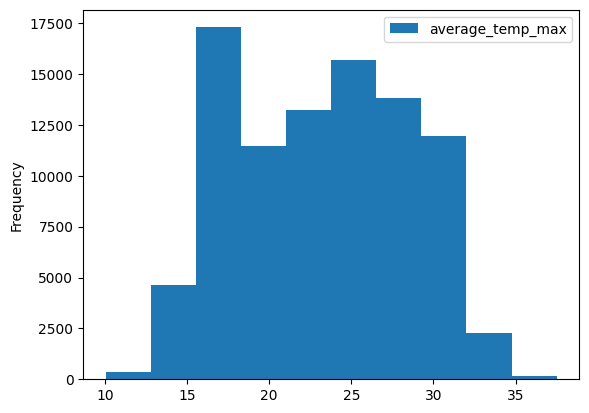

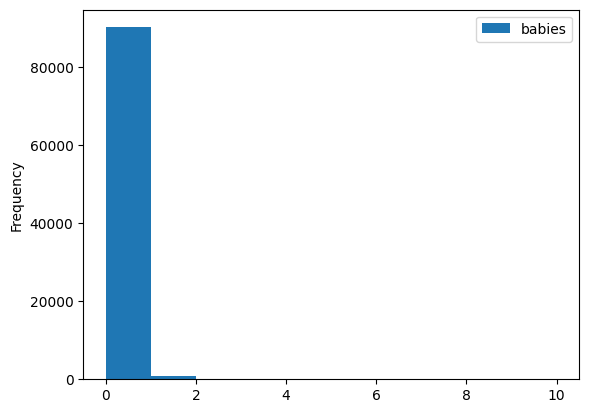

In [ ]:
for column in numerical_columns:
  maindf_c.plot(kind='hist', y=column)

> Im nächsten Schritt checken wir durch eine Korrelationsmatrix den Zusammenhang zwischen allen noch bestehenden Features. Dabei sind hohe Korrelationen, ähnlich wie bei einer Heatmap, rot gekennzeichnet. Man kann vereinzelt stärkere und schwächere Korrelationen erkennen, aber viele Features verhalten sich neutral zueinander.

<Axes: >

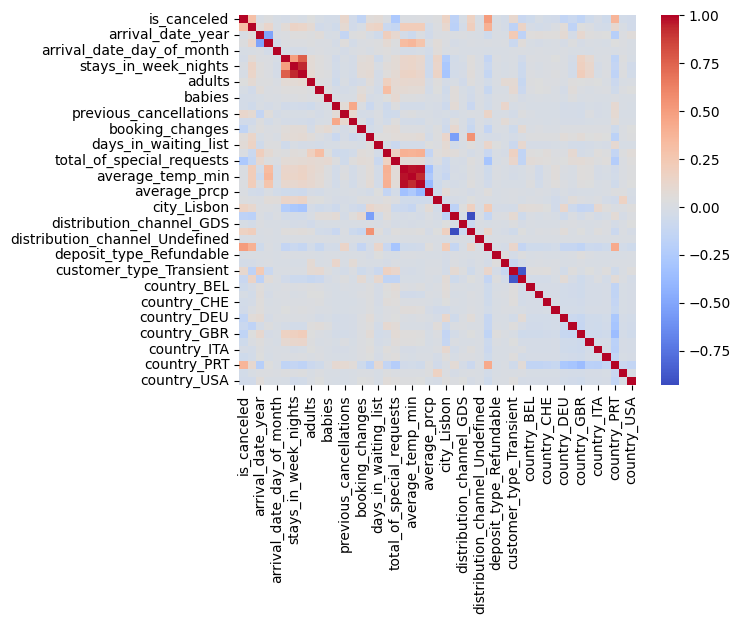

In [ ]:
import seaborn as sns
# .corr() calculates the correlation between each column in our dataframe
sns.heatmap(maindf_c.corr(), annot=False, cmap='coolwarm')

> Im folgenden Schritt werden für das Modelltraining die skallierten Variablen X und y gebildet, wobei X alle Features bis auf die Zielvariable und y die Zielvariable (ob eine Buchung gecancelt wurde) enthält.

In [ ]:
X_scaled = maindf_scaled.drop(columns='is_canceled')
y_scaled = maindf_scaled.is_canceled

> Nun wird der Train-Test-Split durchgeführt, damit die folgenden Modelle trainiert und validiert werden können. Hier wird sich für eine gängige Aufteilung entschieden, wobei die Testdaten 20% ausmachen.

In [ ]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, stratify = y_scaled, shuffle = True)

> Da deutlich mehr Personen den Hotelaufenthalt tatsächlich angetreten haben, als dass gecancelt wurde, wird im folgenden Schritt durch den SMOTE-Algorithmus ein balanciertes Lernen gewährleistet. Es werden synthetische Muster gebildet und der unterrepräsentierten Ausprägung zugeordnet, sodass die Trainingsdaten balanciert sind.

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train,y_train)
X_scaled_smote, y_scaled_smote = smote.fit_resample(X_train_scaled,y_train_scaled)

NameError: ignored

In [ ]:
columns = X_train.columns

X_scaled_smote = pd.DataFrame(data=X_scaled_smote, columns=columns)
y_scaled_smote = pd.DataFrame(data=y_scaled_smote, columns=['is_canceled'])

print("length of oversampled data is ",len(X_scaled_smote))
print("Number of no cancellation in oversampled data",len(y_scaled_smote[y_scaled_smote['is_canceled']==0]))
print("Number of cancellation",len(y_scaled_smote[y_scaled_smote['is_canceled']==1]))

> Abschließend wird die `evaluate`-Function definiert, anhand später die unterschiedlichen Modelle verglichen werden können.



In [ ]:
from sklearn.metrics import classification_report
def evaluate(clf, X_test_scaled, y_true):
  y_pred = clf.predict(X_test_scaled)
  print(classification_report(y_true, y_pred))

# **Modellauswahl und -training**

> Bei dieser Fragestellung haben wir uns für Methoden entschieden, welche eine Klassifikation als Ergebnis liefern. Das liegt daran, dass wir eine binäre Zielvariable haben, und das Modell vorhersagen soll, ob eine Person den Aufenthalt stornieren wird oder nicht (0 | 1)  

## **Logistische Regression**

> Für das erste Modell wird aus dem Paket sklearn.linaer_model die LogisticRegression importiert und anschließend auf die skallierten, ballancierten Daten mit dem random_state = 56 angewandt.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(random_state=56)

In [ ]:
logistic.fit(X_scaled_smote, y_scaled_smote)

> Wir sehen bei der Evaluierung eine Accuracy von 0,79 mit f1-scores von 0,83 und 0,74.

In [ ]:
evaluate(logistic, X_test_scaled, y_test_scaled)

> Die Accuracy können wir uns auch genauer ausgeben lassen, indem wir die `score`-Funktion anwenden.

In [ ]:
logistic.score(X_test_scaled, y_test_scaled)

### Explorieren der Predictions

> Wir sehen, dass 9000 Buchungsstornierungen richtig predictet wurden, sowie 5300 nicht cancellations richtig predictet. Auf den Testdatensatz wurden ca. 3800 Buchungen falsch zugeordnet.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    logistic, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking cancelled', 'Booking not canceled'])

> Wir nutzen die `predict`-Funktion, um zu den X_test_scaled die entsprechenden y-Werte vorherzusagen. Diese Predictions werden dann in einem Dataframe an die entsprechenden X_test und y_test Daten angefügt, um später den Vergleich visualisieren zu können.

In [ ]:
predictions = logistic.predict(X_test_scaled)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

> Mit der Condition df_with_predictions.is_canceled IST NICHT df_with_predictions.Prediction, beschränken wir uns auf die Datensätze, in denen die Predictions von den tatsächlichen Werten abweichen.

In [ ]:
misclassified_df = df_with_predictions[df_with_predictions.is_canceled != df_with_predictions.Prediction]

> Dieses Dataframe können wir nun ausgeben.

In [ ]:
misclassified_df

> In der Visualisierung lassen wir nun die Abweichungen für alle ancoded Spalten ausgeben.

> Es lassen sich kaum Unterschiede zwischen den Grunddaten und den missklafizierten Daten. Was jedoch auffällt ist, dass das Modell öfter eine Buchung als cancellation predictet. Zudem wurden keine Fehlzuordnungen getroffen, wenn der Gast die den deposit_type 'non refund' gewählt hat.  

In [ ]:
for column in encoded_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  df_with_predictions[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (All)', ax=ax1)
  misclassified_df[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (Misclassified)', ax=ax2)

> Das gleiche Verfahren wenden wir nun für die numerischen columns an.

In [ ]:
for column in numerical_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
  df_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  misclassified_df.plot(kind='hist', y=column, title=f'{column} (Misclassified)', ax=ax2)

> Im folgenden wird die ROC-AUC-Kurve ausgegeben, welche ein Maß dafür ist, wie gut ein Klassifikationsmodell in der Lage ist, zwischen verschiedenen Klassen zu unterscheiden. Die x-Achse der Kurve repräsentiert den False Positive Rate (FPR), während die y-Achse den True Positive Rate (TPR) darstellt. Die Fläche unter der ROC-Kurve (AUC) gibt an, wie gut das Modell insgesamt ist. Eine AUC von 1 bedeutet eine perfekte Leistung, während eine AUC von 0,5 darauf hindeutet, dass das Modell nicht besser ist als zufälliges Raten.

> Da bei diesem Modell eine score von 0,78 erreicht wird sehen wir dass das Modell solide performt. Es ist deutlich besser als würde man zufällig zuweisen, aber es ist auch noch nicht perfekt (nahe 1)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_roc_auc = roc_auc_score(y_test, logistic.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### **Feature Importance und Variablen-Reduktion**

> Anschließend weden mit der `recursive feature elimination` analysiert, welche Features die wichtigsten in dem Modell waren. Es teilen sich einige Features den ersten Rang. Interessanter hier sind die nicht so wichtigen features, welche anschließend gelöscht werden, um das Modell noch einmal mit reduzierter Komplexität, aber ähnlicher inhaltlicher Korrektheit, durchzuführen.

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logistic)#, n_features_to_select=10)

rfe.fit(X_scaled_smote, y_scaled_smote)


selected_features = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
print(selected_features)

In [ ]:
ranking = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Ranking': rfe.ranking_})
ranking = ranking.sort_values('Ranking')
print(ranking)

> Bei der Berechnung der `feature importance` sehen wir dass der mit Abstand wichtigste Faktor ist, ob bereits eine frühere Cancellation vorlag. Die beiden folgenden, auch noch hoch relevanten Features sind der deposit type (in diesem Falle, wenn es keine Storno Möglichkeit gibt) und das Herkunftsland des Buchenden wenn dieser aus Portugal stammt.

In [ ]:
feature_importance = abs(logistic.coef_[0])

importance_df = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

> Folgend werden alle features entfernt, welche einen Wert unter 0,1 besitzen. Das übrigbleibende Dataframe wird dann unter einer neuen Variable gespeichert, welche erneut durch den gesamten Modelltraining-Prozess geführt wird.

In [ ]:
less_features_df = maindf_c.drop(columns=['average_prcp', 'babies', 'agent', 'days_in_waiting_list', 'children', 'holiday_flag', 'stay_nights_sum', 'adults', 'average_temperature', 'customer_type_Group', 'distribution_channel_Undefined', 'country_CN', 'deposit_type_Refundable', 'country_SWE', 'country_NLD', 'country_BEL', 'distribution_channel_GDS', 'country_DEU', 'country_CHE', 'customer_type_Transient-Party', 'country_GBR', 'country_USA'])

In [ ]:
new_X = less_features_df.drop(columns='is_canceled')
new_y = less_features_df.is_canceled

In [ ]:
new_X_scaled = less_features_df.drop(columns='is_canceled')
new_y_scaled = less_features_df.is_canceled

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify = new_y, shuffle = True)
new_X_train_scaled, new_X_test_scaled, new_y_train_scaled, new_y_test_scaled = train_test_split(new_X_scaled, new_y_scaled, test_size=0.2, random_state=42, stratify = new_y_scaled, shuffle = True)

In [ ]:
new_smote = SMOTE(random_state=42)
new_X_smote, new_y_smote = smote.fit_resample(new_X_train,new_y_train)
new_X_scaled_smote, new_y_scaled_smote = smote.fit_resample(new_X_train_scaled,new_y_train_scaled)

In [ ]:
def new_evaluate(clf, new_X_test, new_y_true):
  new_y_pred = clf.predict(new_X_test)
  print(classification_report(new_y_true, new_y_pred))

In [ ]:
new_logistic = LogisticRegression(random_state=56)

In [ ]:
new_logistic.fit(new_X_scaled_smote, new_y_scaled_smote)

> Wir sehen dass das reduzieren vermeindlich weniger wichtiger Features aus dem Datensatz die Accuracy leicht verschlechtert hat. Auch die f1-scores sind negativ beeinflusst worden. Es wird sich somit dagegen entschieden die features zu droppen.

In [ ]:
new_evaluate(new_logistic, new_X_test_scaled, new_y_test_scaled)

In [ ]:
new_logistic.score(new_X_test_scaled, new_y_test_scaled)

### **Hyperparametertuning**

> Im folgenden werden die Hyperparameter der logistischen Regression analysiert, um die bestmöglichen Einstellungen für das Modell herauszufinden.

In [ ]:
from scipy.stats import loguniform

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

> Wir sehen dass die optimalen Einstellungen für das Modell folgende sind: 'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_scaled, y_scaled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_model.predict(X_scaled)
print("Classification Report:")
print(classification_report(y_scaled, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84     53349
           1       0.83      0.62      0.71     37565

    accuracy                           0.79     90914
   macro avg       0.80      0.77      0.77     90914
weighted avg       0.80      0.79      0.79     90914



In [ ]:
def hyper_evaluate(clf, X_test, y_true):
  hyper_y_pred = clf.predict(X_test)
  print(classification_report(y_true, hyper_y_pred))

> Mit dem Parameter l2 wird die sogenannte L2-Regulierung angewandt und verringert so die Gefahr vor Overfitting stark, da die Komplexität des Modells reduziert wird und somit weniger anfällig für overfitting ist. Das Modell wird bestraft wenn es große Koeffizienten verwendet. Die Koeffizienten werden während des Trainingsprozesses kleiner gehalten.

In [ ]:
hyper_logistic = LogisticRegression(random_state=56, C=0.1, penalty='l2', solver='liblinear')

> Wir können nun mit den neuen Parametern das Modell neu trainieren, um es zu verbessern.

In [ ]:
hyper_logistic.fit(X_scaled_smote, y_scaled_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, random_state=56, solver='liblinear')

> Wir sehen, dass die Accuracy auch nach dem Parametertuning nicht besser ist als nach dem ursprünglichen Modelltraining. Es weicht allerdings nur minimal ab. Es wird sich für bei der logistischen Regression für die erste Durchführung entschieden, da dort durch die Bank die besten Ergebnisse entstanden sind.  

In [ ]:
hyper_evaluate(hyper_logistic, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10670
           1       0.77      0.71      0.74      7513

    accuracy                           0.79     18183
   macro avg       0.79      0.78      0.78     18183
weighted avg       0.79      0.79      0.79     18183



In [ ]:
hyper_logistic.score(X_test_scaled, y_test_scaled)

0.7921135126216796

# **k-NN (K-Nearest-Neighbor)**


> Der K-Nearest-Neighbor-Algorithmus kann sowohl für Regressions- als auch für Klassifikationsprobleme genutzt werden. In der Regel wird er jedoch als Klassifikationsalgorithmus verwendet.

> Bei diesem Algorithmus wird das Konzept der Nähe genutzt, um einzelne Datenpunkte zu klassifizieren oder Gruppierungen dieser vorhersagen zu können.
Als Klassifikationsalgorithmus eingesetzt, wird davon ausgegangen, dass vergleichbare Datenpunkte dazu neigen in der Nähe voneinander gefunden zu werden, also ähnliche Ausgabewerte haben. Dazu muss ein k-Wert festgelegt werden, der definiert, wie viele Nachbarn mit einem neuen Punkt verglichen werden sollen. Daraus soll am Ende ein Modell trainiert werden, dass neue Datenpunkte selbstständig den Klassen zuordnen kann.


>Um den kNN-Algorithmus verwenden zu können, wird zuerst die Klasse '`KNeighborClassifier`' aus dem Modul '`sklearn.neighbors`' importiert. Als Default ist `n_neighbors = 5` festgelegt.

> Anschließend wurde das Objekt '`knn`' von '`KNeighborClassifier`' erstellt, dass dann für die Klassifikationen der Daten verwendet werden soll.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

>Mit der Funktion '`knn.fit`' wird das Objekt '`knn`' auf die trainierten und skalierten Variablen '`X_train_scaled`' und die Zielvariable (hier '`is_canceld`') '`Y_train_scaled`' gefittet. Der Algorithmus wird also auf die Daten trainiert, mit denen hinterher ein Modell erstellt werden kann, das die Beziehungen zwischen Eingabe- und Zielvariablen lernt.

In [ ]:
knn.fit(X_train_scaled, y_train_scaled)

> Die Funktion '`knn.predict`' wird dazu genutzt,  Vorhersagen zu den skalierten Daten treffen zu können. Das trainierte Modell wird nun also auf die Daten angewendet. Zudem werden die Ergebnisse der Variable '`y_pred`' zugewiesen.

> Ebenfalls sollte die Accuracy ausgegeben werden. Diese beträgt ~0.8321, also 83,21%. Dies stellt bereits eine gute Genauigkeit des trainierten Modells dar.

In [ ]:
y_pred = knn.predict(X_test_scaled)


from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_scaled, y_pred))

> Die '`evaluate`' Funktion zeigt ebenfalls noch einmal die Güte des erlernten kNN-Modells an. Hier werden außerdem noch die Präzision und der F1-Score des Modells ausgegeben. Da ein F1-Score von 1 angestrebt werden sollte, zeigt auch dies, dass ein gutes Modell erstellt wurde.

In [ ]:
evaluate(knn, X_test_scaled, y_test_scaled)

> In der Confusion-Martix ist nun zu sehen, wie häufig die Stornierung einer Buchung vorhergesagt wurde und wie häufig diese auch tatsächlich eingetreten ist. Gleiches gilt für Buchungen, die nicht storniert wurden.

> Laut Matrix wurden 10.000 Werte korrekt als Stornierung vorhergesagt. In 1.874 Fällen, wurde fälschlicherweise eine Stornierung prognostiziert.
Gleiches Prinzip gilt für das Label '`Booking not canceld`'. Hier wurden 5.868 Fälle richtig und 1.363 Fälle falsch eingeordnet.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking cancelled', 'Booking not canceled'])

## Hyperparametertuning

> Um die Performance des Ergebnisses noch verbessern zu können soll ein Hyperparameter Tuning durchgeführt werden. Ziel ist es die besten Parameter zu bestimmen, um das Modell präziser machen zu können.



>Für das Hyperparameter Tuning wird das '`Exhaustive Grid Search Verfahren`' verwendet. Hierbei können beliebig viele Hyperparameter verwendet werden. Zudem kann ausgewählt werden, wie viele Kombinationen der Hyperparameter und Kreuzvalidierungen ausprobiert werden sollen. Insgesamt ist das '`Exhaustive Grid Search Verfahren`' eine gute Methode, um den besten Hyperparameter zu identifizieren. Das Verfahren kann jedoch auch mit jedem zusätzlichen Parameterwert und jeder zusätzlichen Kreuzvalidierung sehr zeitaufwändig werden.

>Für das Verfahren wird zunächst die Funktion '`GridSearchCV`' aus der Klasse '`sklearn.model_selection`' importiert, um die besten Kombinationen von Hyperparametern in einem Modell finden zu können.

>Bei '`GridSearchCV`' wird der Parameter des Schätzers durch eine kreuzvalidierte grid-search (Gittersuche) durch ein Parametergitter optimiert.

>Die Funktion wurde schon importiert und muss an dieser Stelle nicht noch einmal geladen werden.

>Mit der Funktion '`grid_params`' wird ein Gitter von Parametern für das Hyperparameter Tuning festgelegt. Im Falle des kNN-Algorithmus gibt es hier drei Parameter. '`n_neighbors`', '`weights`' und '`metric`'.

>'`n_neighbors`' soll das beste k auf Grundlage der zuvor bestimmten Werte errechnen. Die dahinter angegebenen Werte sollen die Anzahl der 'nearest neighbors' anzeigen, die für die Vorhersage berücksichtigt werden.

>'`weights`' prüft, ob das Hinzufügen von Gewichten zu Datenpunkten im Modell einen positiven Effekt hat, oder nicht. '`uniform`' weist dabei keine Gewichte zu, was bedeutet, dass alle benachbarten Datenpunkte gleich gewichtet werden. Bei '`distance`' hingegen wird die Gewichtung basierend auf dem Abstand zu anderen Datenpunkten festgelegt. Dies bedeutet, dass näher gelegene Punkte höher gewichtet werden, als weiter entfernte Punkte.

>'`metric`' ist die Abstandsmetrik, die zur Berechnung der Ähnlichkeit verwendet wird. In diesem Fall werden die Metriken 'minkowski', 'euclidean' und 'manhatten' ausgeführt.



In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

>Wir übergeben diese im Grid hinterlegten Paraneter, den Classifier und weitere Parameter an die GridSearch mit cross-validation.

>'`verbose = 1`' steht dafür, dass während der Durchführung Informationen über den Fortschritt angegeben werden sollen.

>Mit '`cv = 3`' wird eine Klassenvalidierung von 3 angegeben. Das bedeutet, dass das GridSearch das Modell 108 (6x2x3x3) Mal mit verschiedenen Hyperparametern evaluieren wird.

>Mit der Einstellung '`n_jobs = -1`' soll die maximale Anzahl an gleichzeitig verwendeten Prozessoren festgelegt werden. Die Angabe '-1' bedeutet dabei, dass alle verfügbaren Prozessoren verwendet werden sollen, um die Berechnungen zu beschleunigen.




In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

>Nun wird das abgeänderte Modell auf die skalierten Daten trainiert.

In [ ]:
g_res = gs.fit(X_train_scaled, y_train_scaled)

>Es soll nun der beste Score gefunden werden. Dieser liegt hier bei ~0,8530.

In [ ]:
g_res.best_score_

>Anschließend sollen die Hyperparameter mit dem besten Score ausgegeben werden. Diese sind hier '`n_neighbors: '15', weights: 'distance', metric: 'manhatten'`'. Aufgrund der langen Rechenzeit von ca. 45 min wurde außerdem ein Parameter '`ht_params`' erstellt.

In [ ]:
ht_params=g_res.best_params_
ht_params

>Die ausgegebenen besten Parameter werden nun in das Modell eingesetzt und neu berechnet.

In [ ]:
optimized_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', algorithm = 'brute', metric = 'manhattan')
optimized_knn.fit(X_train_scaled, y_train_scaled)

> Als nächstes sollen mit dem trainierten kNN-Klassifikator und der '`predict`'-Funktion Vorhersagen getroffen werden. Die Vorhersagen werden für die skalierten Trainingsdaten sowie die skalierten Testdaten gemacht.


In [ ]:
y_optimized_trin_knn = optimized_knn.predict(X_train_scaled)
y_optimized_knn = optimized_knn.predict(X_test_scaled)

> Die Genauigkeit des Training Sets beträgt nun ~0,8859, also 88,59% und die Genauigkeit des Test Sets ~0,8321, also 83,21%.

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train_scaled, y_optimized_trin_knn))
print('Test set accuracy: ',metrics.accuracy_score(y_test_scaled, y_optimized_knn))

Training set accuracy:  0.8859017754088369
Test set accuracy:  0.8320883909119203


>Wie zu sehen, hat sich die Güte des Modells durch das Hyperparameter Tuning verbessert. Die Werte sind gestiegen und näher der 1 bzw. 100% gerückt.

In [ ]:
evaluate(g_res, X_test_scaled, y_test_scaled)

>Zum Schluss wurde nochmals eine '`Confusion Matrix`' erstellt. Auch hier ist zu sehen, dass die Werte der False-Positives (1.679) und die der False-Negatives (1.017) nach dem Hyperparameter Tuning gesunken sind. Die True-Positives (10.519) und die True-Negatives (6.063) sind im Vergleich zum Modell vor dem Hyperparameter Tuning gestiegen. Wie auch in der Evaluations Tabelle zu sehen, wurde das Modell nicht nur Genauer, sondern auch Präziser.

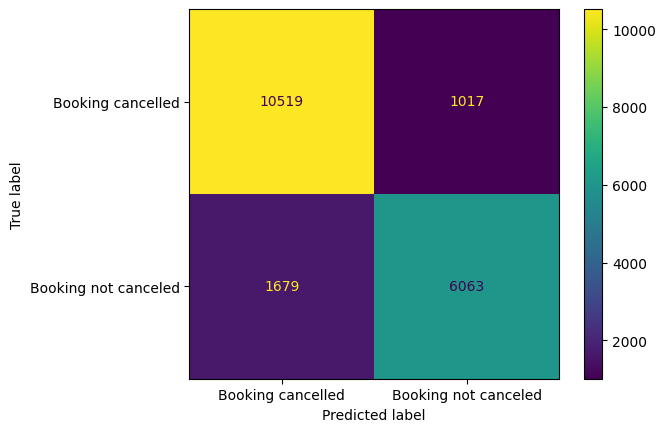

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    g_res, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking cancelled', 'Booking not canceled'])

> Das Hyperparameter Tuning mit GridSearch beim knn-Modell dauert ca. 45 Minuten. Wir vermuten daher, dass wir bei komplexeren Modellen auf die RandomizedSearch ausweichen müssen, um die Laufzeit zu verkürzen.

# **Support Vector Machines**



> Support Vector Machines sind im Machine Learning weit verbreitete Algorithmen, insbesondere für Klassifikationsaufgaben. Dabei kann über den Parameter 'kernel' bestimmt werden, durch welche Funktionsform die Klassen gebildet werden (linear, rbf, polynomial). Für große Datenmengen, wie sie in unserem Fall vorliegen, eignen sich die Standard-SVCs leider nicht, wir benötigen die schnellere Implementierung, den LinearSVC. Dieser Classifier akzeptiert allerdings den Parameter 'kernel' nicht bzw. der Parameter muss nicht definiert werden.

> Wir importieren den LinearSVC aus dem sklearn.svm-package, trainieren das Modell und evaluieren das gefittete Modell.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score, recall_score, precision_score

from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingClassifier



> Nach Bestimmung des Classifier-Modells `LinearSVC`, dem `random_state=42` und dem Toleranzwert `tol=1e-5`, der definiert, wann das Training beendet werden soll (wenn die Vorhersagen weniger oder gleich dem Toleranzwert von den tatsächlichen Zielwerten abweichen). Nach Definition der Parameter trainieren wir das Modell auf die skalierten Trainingsdaten.


In [ ]:
X, y = make_classification(n_features=4, random_state=42)
svc_clf = LinearSVC(random_state=42, tol=1e-5)

svc = svc_clf.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(




> Wir lassen uns außerdem die y-Werte auf Basis der skalierten X-Testdaten mithilfe des soeben trainierten Modells vorhersagen. Dafür nutzen wir die Funktion `predict()`. Für die darauffolgende Evaluation mit der oben definierten `evaluate`-Funktion müssen wir außerdem das predictete y-Werte-Array anpassen. Über `reshape` reduzieren wir die y-Werte auf ein eindimensionales Array, das wir so auch in die `evaluate`-Funktion übergeben können.



In [ ]:
y_svc_predict = svc_clf.predict(X_test_scaled)
y_svc_predict = y_svc_predict.reshape(-1,1)



> Wir sehen, dass das Modell mit einer Acuracy von 0.79 und auch einem f1-score in diesem Bereich relativ akkurat die y-Ergebnisse des Test-Datensatzes ausgibt. Es könnte sich lohnen, hier durch Hyperparameter Tuning das Modell noch durch die Auswahl der besten Hyperparameter zu verbessern.



In [ ]:
evaluate(svc, X_test_scaled,y_test_scaled)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     10670
           1       0.85      0.62      0.71      7513

    accuracy                           0.80     18183
   macro avg       0.81      0.77      0.78     18183
weighted avg       0.80      0.80      0.79     18183





> Über die Confusion Matrix können wir nun auch darstellen, wie häufig bestimmte Werte predictet wurden und stellen diese den tatsächlich eingetretenen Fällen gegnüber.



> rund 9900 Werte wurden korrekt als 'is_canceled' predictet, 831 wurden als 'canceled' predictet, obwohl keine Cancellation vorlag, 2900 wurden gecancelt, aber nicht als solche predictet und rund 4600 Fälle wurden nicht gecancelt und korrekterweise auch nicht als solche vorhergesagt.





In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_scaled, y_svc_predict))

Confusion Matrix:
[[9851  819]
 [2892 4621]]




> Für eine noch übresichtlichere Darstellung plotten wir die Ergebnisse der Confusion Matrix.



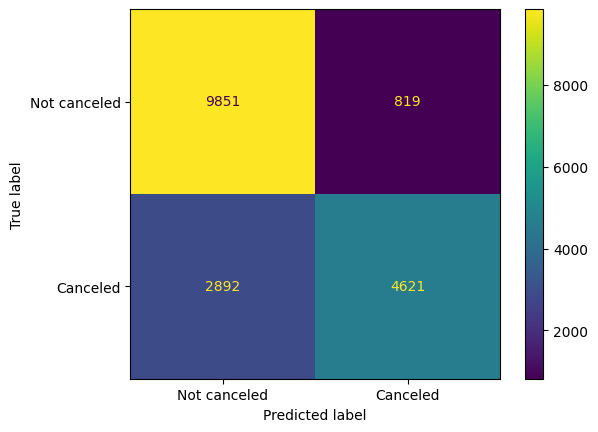

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    svc, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Not canceled', 'Canceled'])

## **Hyperparameter Tuning**

> Wir versuchen nun durch definieren verschiedener Hyperparameter die Accuracy unseres Modells noch zu verbessern. Durch Recherche und Ausprobieren verändern wir nach und nach die Parameter, um das bestmögliche Ergebnis zu erreichen.
Die ausgewählten Parameter speichern wir jeweils in einem Grid, das wir dann in die RandomizedSearchCV übergeben, die zufällig verschiedene Kombinationen der Parameter durchtestet und gleichzeitig cross-validation durchführt.

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'dual': [True, False],
    'fit_intercept': [True, False],
    'intercept_scaling': loguniform(0.1, 10),
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [100, 500, 1000],
    'penalty': ['l1', 'l2'],
    'tol': loguniform(0.0001, 0.1),
    'verbose': [0, 1]
}

> Wir übergeben nun den Classifier, das definierte Grid mit den spezifizierten Hyperparametern, dem `random_state 42` und der Anzahl an Verbesserungsinterationen der RandomizedSearch mit kombinierter cross-validation.
> Danach kann das Modell an die skalierten Trainingsdaten angepasst werden.

In [ ]:
ht_svc = RandomizedSearchCV(svc_clf, param_grid, random_state=42, n_iter=10)

In [ ]:
ht_svc.fit(X_train_scaled, y_train_scaled)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[LibLinear]

RandomizedSearchCV(estimator=LinearSVC(random_state=42, tol=1e-05),
                   param_distributions={'C': [0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e9fc5444040>,
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e9fc5150070>,
                                        'verbose': [0, 1]},
                   random_state=42)

> Nach Beenden des Hyperparameter Tunings können wir die besten Hyperparamter ausgeben und einsehen.

In [ ]:
ht_svc.best_params_

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.593052261624101,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'penalty': 'l2',
 'tol': 0.00014765043713594345,
 'verbose': 1}

> Wir evaluieren außerdem unser Modell. Durch Hyperparameter Tuning hat sich die Accuracy um % verbessert.

In [ ]:
evaluate(ht_svc, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     10670
           1       0.85      0.62      0.71      7513

    accuracy                           0.80     18183
   macro avg       0.81      0.77      0.78     18183
weighted avg       0.80      0.80      0.79     18183



# Decision Tree

> Im Folgenden wollen wir eine Classification mithilfe eines Decision Trees durchführen. Wir beginnen, indem wir alle für die Analyse notwendigen Funktionen einlesen.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

> Wir definieren unser Classification-Methode als DecisionTreeClassifier.

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

> Im nächsten Schritt trainieren wir das Modell auf den Trainingsdaten.

In [ ]:
tree.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(random_state=42)

> Wir lassen uns die Targetvariable auf Basis der Testdaten vorhersagen.

In [ ]:
y_test_pred = tree.predict(X_test_scaled)

> Evaluieren wir zuerst die Performance des Models auf Basis der Trainingsdaten erhalten wir eine Accuracy von 0.99.

> Daraus schließen wir, dass das Modell bei den Trainingsdaten außergewöhnlich gut funktioniert und die dort vorhandenen Muster sehr gut anpassen oder speichern kann. Wir sprechen hier von Overfitting.

> Um diese Annahme zu bestätigen, lassen wir uns im zweiten Schritt die Performance des Models auf Basis der Testdaten ausgeben.

In [ ]:
evaluate(tree, X_train_scaled, y_train_scaled)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     42679
           1       1.00      0.99      0.99     30052

    accuracy                           0.99     72731
   macro avg       1.00      0.99      0.99     72731
weighted avg       0.99      0.99      0.99     72731



> Hier erhalten wir eine Accuracy von 0.84. Die Leistung des Modells ist bei den Testdaten also deutlich geringer im Vergleich zu den Trainingsdaten. Diese Diskrepanz deutet darauf hin, dass das Modell nicht gut auf neue Beispiele verallgemeinert und bestätigt unsere Annahme des Overfittings.

In [ ]:
evaluate(tree, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10670
           1       0.80      0.81      0.80      7513

    accuracy                           0.84     18183
   macro avg       0.83      0.83      0.83     18183
weighted avg       0.84      0.84      0.84     18183



> Den Accuracy Score von 0.84 sehen wir als vergleichsweise gutes Ergebnis an, werden aber im weiteren Verlauf versuchen, ihn durch Hyperparameter Tuning weiter zu optimieren.

## Hyperparameter Tuning

> Um unser Decision-Tree-Modell zu optimieren, führen wir im nächsten Schritt das Hyperparameter Tuning durch.

> Wir definieren erneut unsere Classification-Methode, allerdings ohne bereits einen 'random_state' vorzugeben.

In [ ]:
tree = DecisionTreeClassifier()

### RandomizedSearchCV

> Zu aller erst wollen wir wissen, welche Parameter sich aktuell im Decision Tree Classifier befinden und uns damit für das Hyperparameter Tuning zur erfügung stehen.

In [ ]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(tree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


> Wir erstellen ein Grid, in dem wir für alle relevanten Parameter einen Suchbereich bestimmen. Dieser enthält definierte Optionen, die durchgetestet werden sollen und anhand derer die optimale Parametereinstellung gefunden werden soll.

In [ ]:
from scipy.stats import loguniform

param_grid = {
    'criterion': ['entropy','gini','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [None,3, 5, 7, 9],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [4, 5, 7, 9, 11, 13,'log2','sqrt',None],
    'random_state': [None, 21, 42]
}

> Wir definieren unsere Methode als RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

ht = RandomizedSearchCV(tree, param_grid, n_iter=10)

In [ ]:
ht.fit(X_train_scaled, y_train_scaled)

ValueError: ignored

In [ ]:
ht.best_params_

{'splitter': 'best',
 'random_state': 42,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 11,
 'max_depth': 9,
 'criterion': 'gini'}

In [ ]:
evaluate(ht, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     10670
           1       0.82      0.68      0.74      7513

    accuracy                           0.81     18183
   macro avg       0.81      0.79      0.79     18183
weighted avg       0.81      0.81      0.80     18183



> Die Accuracy unseres Models ist nach dem Hyperparameter Tuning etwas niedriger als zuvor.

### GridSearchCV

> Wir versuchen uns an einer Alternative zum RandomizedSearchCV: dem GridSearchCV.

> Dafür passen wir die Parameter in unserem Search Grid an bzw. minimiren ihren Umfang. Grund hierfür ist die hohe Komplexität und lange Laufzeit des Fittings.

In [ ]:
param_grid = {
    'criterion': ['entropy','gini','log_loss'],
    'max_depth': [None,3, 5, 7, 9],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 4, 6],
}

In [ ]:
ht = GridSearchCV(tree, param_grid, n_jobs=2)

In [ ]:
ht.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 3, 5, 7]})

In [ ]:
ht.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [ ]:
evaluate(ht, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10670
           1       0.81      0.81      0.81      7513

    accuracy                           0.84     18183
   macro avg       0.83      0.83      0.83     18183
weighted avg       0.84      0.84      0.84     18183



> Wir erhalten mit GridSearchCV eine Accuracy identisch zu unserem Modell vor dem Hyperparameter Tuning.

## Finaler Decision Tree

In [ ]:
tree = DecisionTreeClassifier(
    splitter='best',
    random_state=42,
    min_samples_split=7,
    min_samples_leaf=4,
    max_features=None,
    max_depth=None,
    criterion='entropy')

In [ ]:
tree.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=7, random_state=42)

In [ ]:
y_pred = tree.predict(X_test_scaled)

In [ ]:
evaluate(tree, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     10670
           1       0.82      0.78      0.80      7513

    accuracy                           0.84     18183
   macro avg       0.83      0.83      0.83     18183
weighted avg       0.84      0.84      0.84     18183



> Wenn wir uns den Confusion Matrix ausgeben lassen erkennen wir, dass eine sehr ähnliche Anzahl an Fehlern 'False Positive' und 'False Negative' sind. Es besteht demnach nur ein sehr geringer Unterschied zwischen den falschen Vorhersagen einer stornierten und einer nicht-storierten Buchung.

In [ ]:
print(confusion_matrix(y_test_scaled, y_pred))

[[9344 1326]
 [1654 5859]]


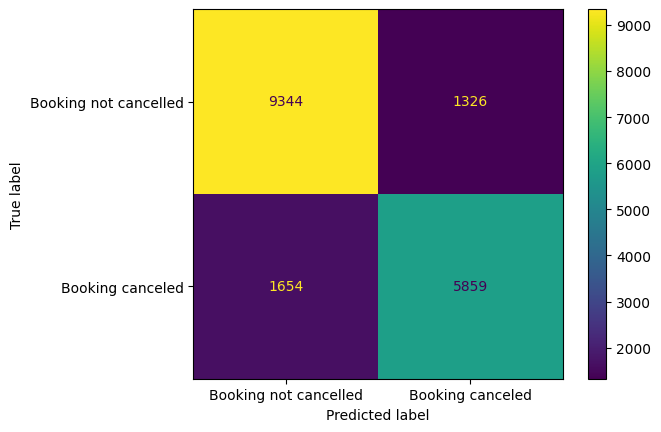

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    tree, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking not cancelled', 'Booking canceled'])

> Wir möchten uns den Decision Tree visualisieren lassen, um direkt ablesen zu können, wo das Modell die Schwellenwerte der einzelnen Variablen setzt, die entscheiden, ob eine Buchung storniert wird oder nicht.

> Vorerst werden die erforderlichen Pakete installiert.

> Wir begrenzen die Visualisierung auf eine Breite von 25 Pixeln und eine Höhe von 20 Pixeln.

> Der Baum soll sich außerdem auf maximal 4 abzweigende Ebenen beschränken und mit einer Schriftgröße von 12 angezeigt werden. Die Features sollen analog zu den Variablen und die letztendlichen Klassen analog zu dem Fakt Keine Stornierung/Stornierung betitelt werden.

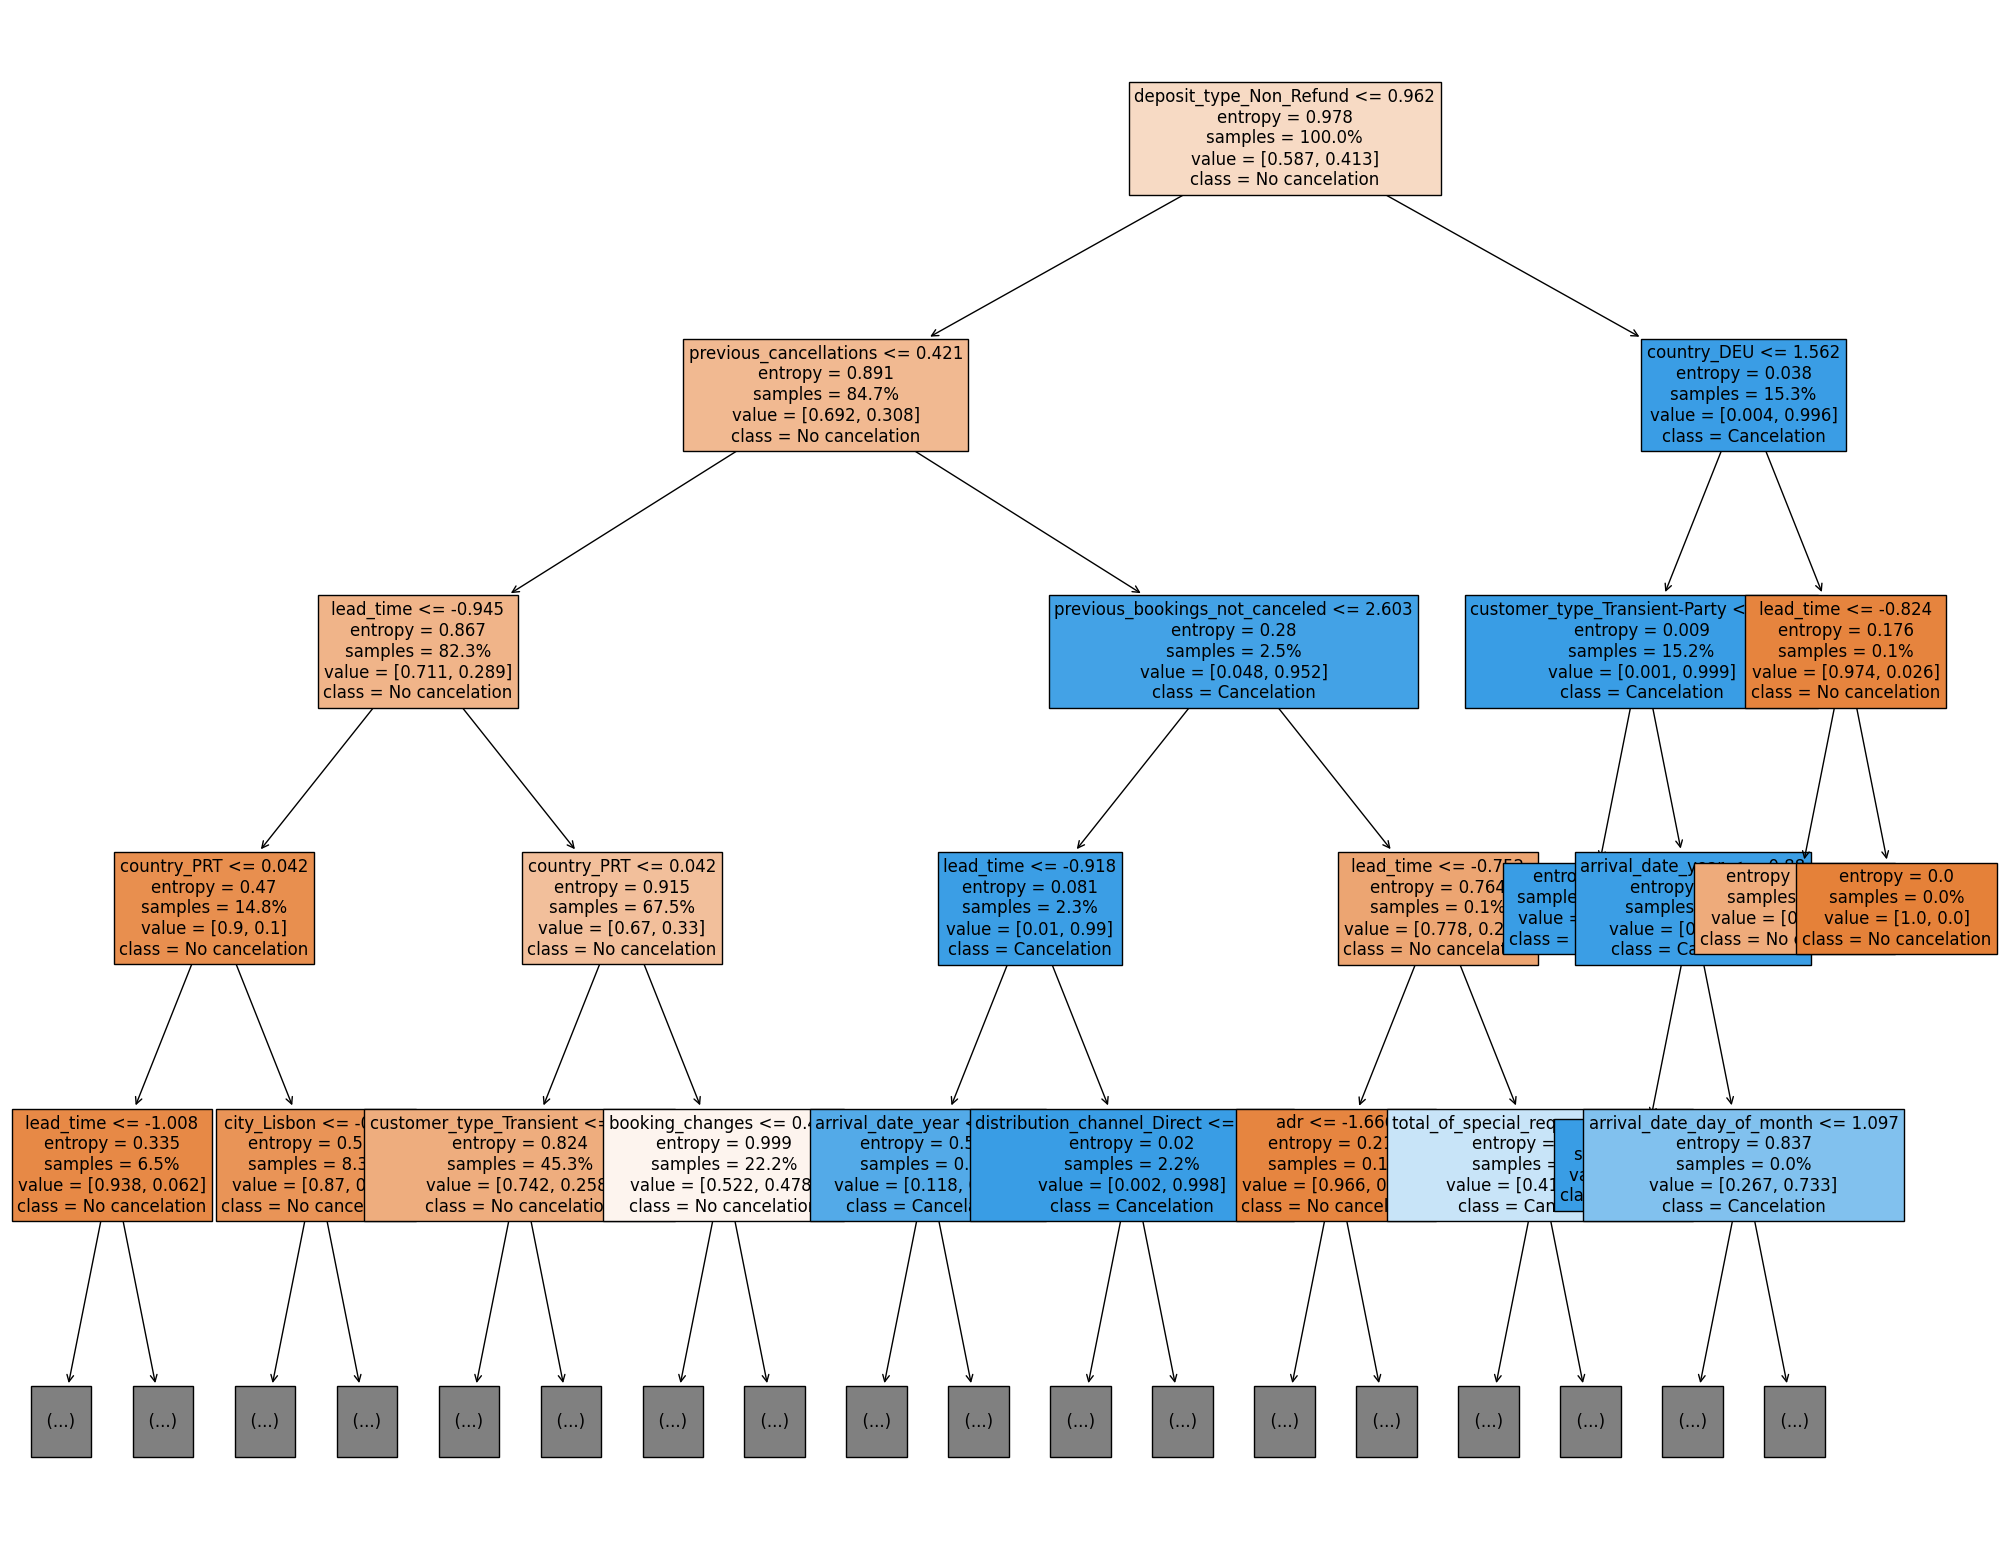

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))

sktree.plot_tree(tree,
                 max_depth=4,
                 fontsize=12,
                 feature_names=X.columns,
                 class_names=['No cancelation', 'Cancelation'],
                 proportion=True,
                 filled=True);

# Random Forest

> Im nächsten Schritt möchten wir die Classification mit der Methode des Random Forest durchführen.

> Dafür laden wir die erforderliche Funktion `RandomForestClassifier()` und definieren diese als Methode für unsere Clasification. Hierbei definieren wir nur einen Parameter, und zwar `random_state`. Weitere Parameter werden wir ggf. im Laufe des Hyperparameter Tunings hinzufügen.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=42)

> Wir trainieren unser Modell auf den Trainingsdaten.

In [ ]:
forest.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier(random_state=42)

 > Wenden wir die Funktion `evaluate()` auf unser Modell mit den Trainingsdaten an, erhalten wir analog zum Decision Tree auch beim Random Forest eine extrem hohe Accuracy von 0.99.

In [ ]:
evaluate(forest, X_train_scaled, y_train_scaled)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     42679
           1       1.00      0.99      0.99     30052

    accuracy                           0.99     72731
   macro avg       0.99      0.99      0.99     72731
weighted avg       0.99      0.99      0.99     72731



> Viel relevanter für die Bewertung der Performance sind allerdings die Accuracy und der $F_1$-Score auf Basis der Testdaten.

> Unser Modell erzielt eine Accuracy von 0.88 und einen $F_1$-Score von 85%. Die Performance ist also bereits deutlich besser als bei den vorherigen Classification-Modellen.

In [ ]:
evaluate(forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10670
           1       0.89      0.81      0.85      7513

    accuracy                           0.88     18183
   macro avg       0.88      0.87      0.87     18183
weighted avg       0.88      0.88      0.88     18183



## Hyperparameter Tuning

> Um unser Modell zu optimieren, führen wir im nächsten Schritt das Hyperparameter Tuning durch.

In [ ]:
forest_ht = RandomForestClassifier(random_state=42)

### RandomizedSearchCV

> Zu aller erst wollen wir wissen, welche Parameter sich aktuell im Random Forest Classifier befinden und uns damit für das Hyperparameter Tuning zur erfügung stehen.

In [ ]:
from pprint import pprint
print('Verfügbare Parameter in RandomForestClassifier() mit jeweiligem Default:\n')
pprint(forest_ht.get_params())

Verfügbare Parameter in RandomForestClassifier() mit jeweiligem Default:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


> Wir erstellen ein "Grid" in Form eines Dictionaries, in dem wir für alle relevanten Parameter einen Wertebereich bestimmen. Anhand dessen soll die optimale Parametereinstellung für unseren Random Forest gefunden werden.

In [ ]:
param_grid_forest = {
    'bootstrap': [True],
    'max_depth': [None,3, 5, 7, 9],
    'max_features': [4, 5, 7, 9, 11, 13,'auto','sqrt','log2',None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 3, 5, 7],
    'n_estimators': [80, 100, 120],
    'random_state': [42]
}

> Wir definieren die Klasse `RandomizedSearchCV()` für unser Hyperparameter Tuning.

> Damit das Hyperparameter Tuning im nächsten Schritt nicht allzu lange dauert, setzen wir den Parameter `n_jobs` auf 10. Somit können 10 Vorgänge parallel ablaufen.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
ht_forest = RandomizedSearchCV(forest_ht, param_grid_forest, n_jobs=10, random_state=42)

> Mit der `fit()`-Funktion beginnen wir das Hyperparameter Tuning auf Basis der Trainingsdaten.

In [ ]:
ht_forest.fit(X_train_scaled, y_train_scaled)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=10,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 3, 5, 7, 9],
                                        'max_features': [4, 5, 7, 9, 11, 13,
                                                         'auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 3, 5, 7],
                                        'n_estimators': [80, 100, 120],
                                        'random_state': [42]},
                   random_state=42)

> Wir lassen uns die aus unserem Grid gewählten Parameter ausgeben, deren Modell die beste Performance erzielt hat.

In [ ]:
ht_forest.best_params_

{'random_state': 42,
 'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

> Wir bekommen folgende Werte als **optimale Parameter-Einstellungen**: random_state: 42, n_estimators: 100, min_samples_split: 7, min_samples_leaf: 4, max_features: None, max_depth: None, bootstrap: True

> Um zu erkennen, ob das Hyperparameter Tuning unser Random Forest Modell tatsächlich verbessert hat, lassen wir uns mithilfe der `evaluate()`-Funktion unter Anderem die Accuracy und den $F_1$-Score ausgeben.

In [ ]:
evaluate(ht_forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10670
           1       0.88      0.80      0.83      7513

    accuracy                           0.87     18183
   macro avg       0.87      0.86      0.86     18183
weighted avg       0.87      0.87      0.87     18183



> Nach dem Hyperparameter Tuning mit `RandomizedSearchCV()` performt der Random Forest mit einem $F_1$-Score von 83% und einer Accuracy von 0.87 minimal schlechter als vorher.

> Wir möchten das Hyperparameter Tuning erneut durchführen, allerdings mit einem zweiten Grid mit angepassten Wertebereichen.

In [ ]:
param_grid_forest = {
    'criterion':  ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [100, 200, 300, 400, 500],
    'random_state': [42]
}

ht_forest = RandomizedSearchCV(forest_ht, param_grid_forest, n_jobs=10, random_state=42)

ht_forest.fit(X_train_scaled, y_train_scaled)

ht_forest.best_params_

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'random_state': 42,
 'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': False}

> Wir bekommen folgende Werte als **optimale Parameter-Einstellungen**: random_state: 42, n_estimators: 100, min_samples_split: 7, min_samples_leaf: 4, max_features: None, max_depth: None, bootstrap: True

In [ ]:
evaluate(ht_forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10670
           1       0.89      0.78      0.83      7513

    accuracy                           0.87     18183
   macro avg       0.87      0.86      0.86     18183
weighted avg       0.87      0.87      0.87     18183



> Wir erhalten eine Accuracy und einen $F_1$-Score identisch zum Versuch mit dem ersten Grid.

### GridSearchCV

> In einem letzten Versuch der Optimierung verwenden wir eine Alternative zum `RandomizedSearchCV()`: den `GridSearchCV()`.

> Dafür passen wir die Parameter in unserem Grid an bzw. minimieren ihren Umfang. Grund hierfür ist die hohe Komplexität und lange Laufzeit des Fittings.

In [ ]:
param_grid_ht = {
    'max_features': [5, 9, 13,'log2',None],
    'max_leaf_nodes': [20, 40, None],
    'max_samples': [1, 3, 5, 7],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [3, 7],
    'n_estimators': [100, 120],
}

> Wir definieren die Klasse `GridSearchCV()` für unser Hyperparameter Tuning und setzen den Parameter `n_jobs` erneut auf 10, um die Laufzeit des Prozesses zu minimieren.


In [ ]:
ht_forest = GridSearchCV(forest_ht, param_grid_forest, n_jobs=10)

> Mit der `fit()`-Funktion beginnen wir das Hyperparameter Tuning auf Basis der Trainingsdaten.

In [ ]:
ht_forest.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

> Wir lassen uns die aus unserem Grid gewählten Parameter ausgeben, deren Modell die beste Performance erzielt hat.

In [ ]:
ht_forest.best_params_

{'max_features': None,
 'max_leaf_nodes': 40,
 'max_samples': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 120}

> Wir bekommen folgende Werte als **optimale Parameter-Einstellungen**: n_estimators: 120, min_samples_split: 3, min_samples_leaf: 1, max_features: None, max_leaf_nodes: 40, max_samples: 7

> Um zu erkennen, ob das Hyperparameter Tuning mit `GridSearchCV` noch weiterverbessern konnte, lassen wir uns erneut die Accuracy und den $F_1$-Score ausgeben.

In [ ]:
evaluate(ht_forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.68      0.99      0.80     10670
           1       0.95      0.33      0.49      7513

    accuracy                           0.72     18183
   macro avg       0.81      0.66      0.65     18183
weighted avg       0.79      0.72      0.68     18183



## Finaler Random Forest

In [ ]:
forest = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False)

In [ ]:
forest = RandomForestClassifier(
    random_state=42,
    min_samples_split=2,
    max_features='sqrt')

In [ ]:
forest.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier(random_state=42)

In [ ]:
evaluate(forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10670
           1       0.89      0.81      0.85      7513

    accuracy                           0.88     18183
   macro avg       0.88      0.87      0.87     18183
weighted avg       0.88      0.88      0.88     18183



In [ ]:
y_pred = forest.predict(X_test_scaled)

> Lassen wir uns die Confusion Matrix einmal visualisieren, erkennen wir, dass nahezu doppelt so viele der falschen Vorhersagen angeben, eine Buchung würde nicht storniert, wenn sie in Wirklichkeit storniert wird.

In [ ]:
print(confusion_matrix(y_test_scaled, y_pred))

[[9923  747]
 [1447 6066]]


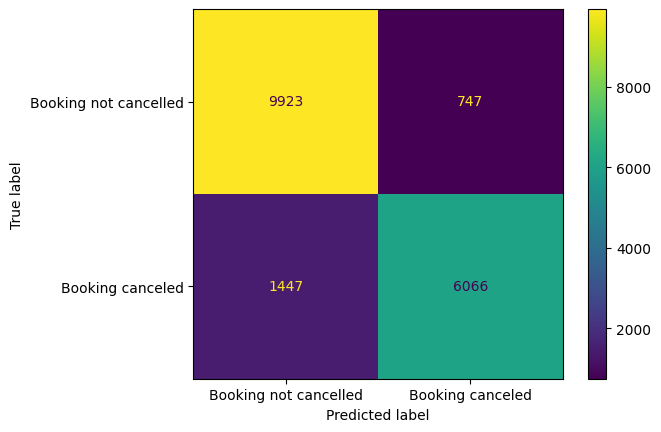

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    forest, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking not cancelled', 'Booking canceled'])

In [ ]:
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(y_pred, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
misclassified_df = df_with_predictions[df_with_predictions.is_canceled != df_with_predictions.Prediction]

In [ ]:
misclassified_df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,previous_cancellations,...,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA,is_canceled,Prediction
59602,28,2017,2,26,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
52380,22,2016,9,6,2,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7387,32,2016,8,27,5,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5118,0,2016,4,29,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6672,119,2016,7,19,7,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59845,37,2017,3,2,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58250,58,2017,1,13,2,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9009,22,2016,12,8,3,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4296,18,2016,3,22,1,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


<ipython-input-143-821c006c9b93>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)


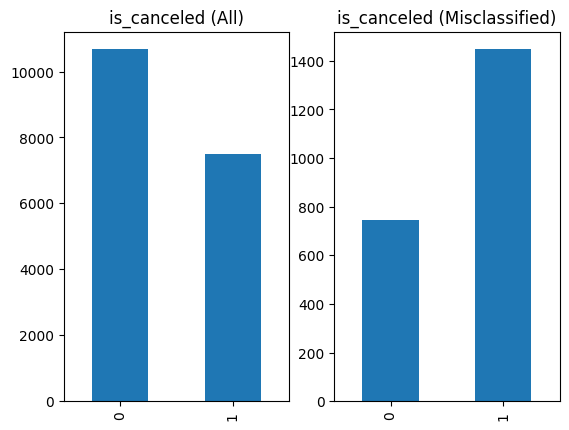

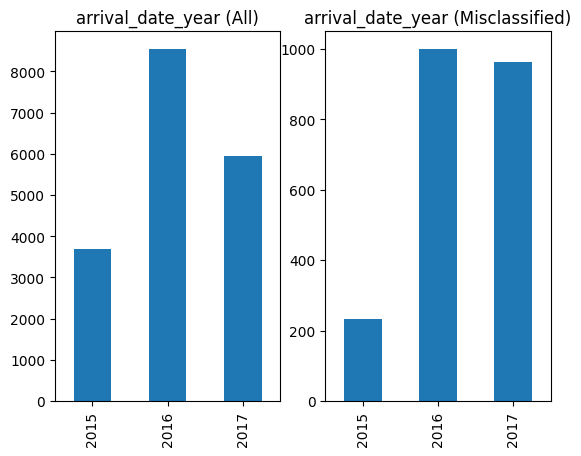

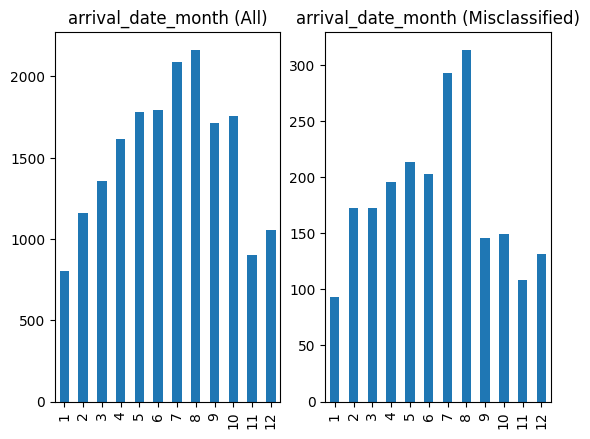

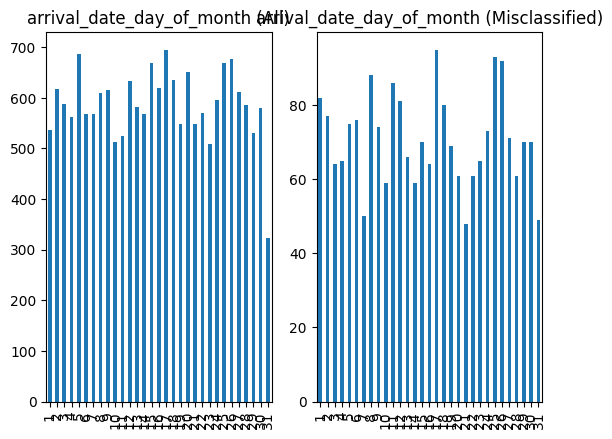

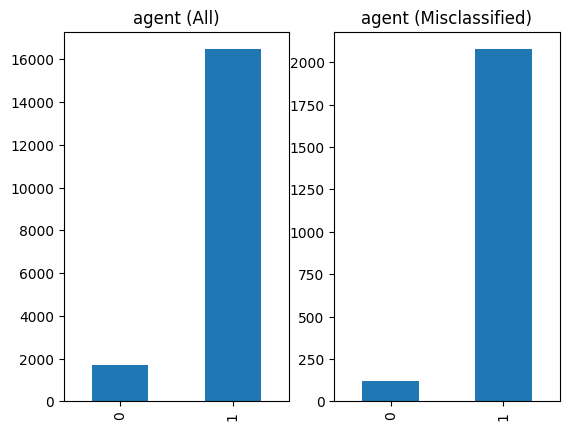

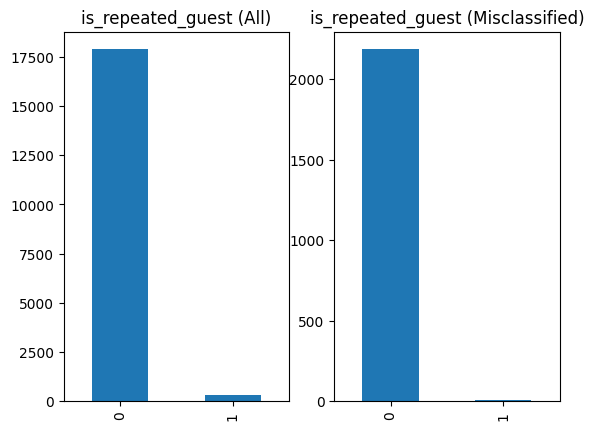

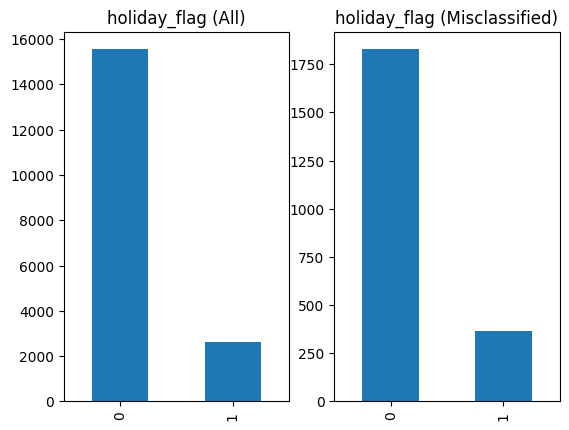

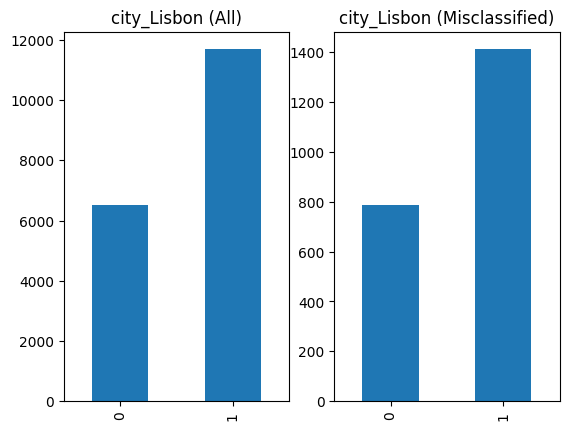

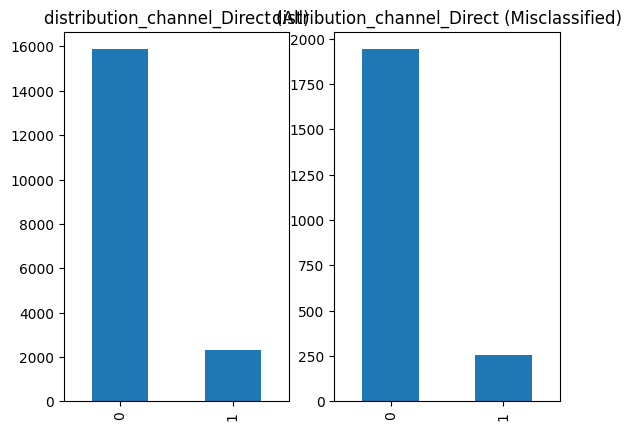

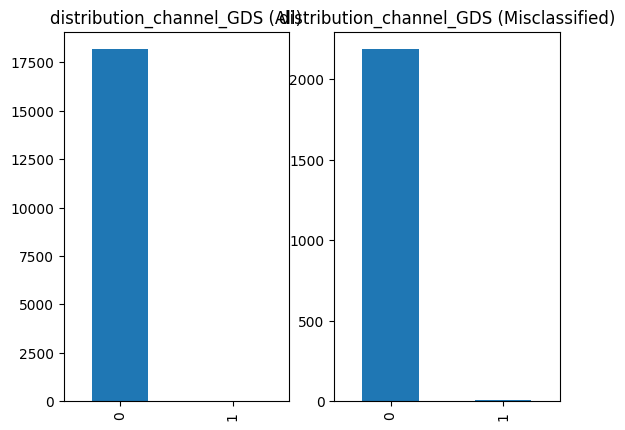

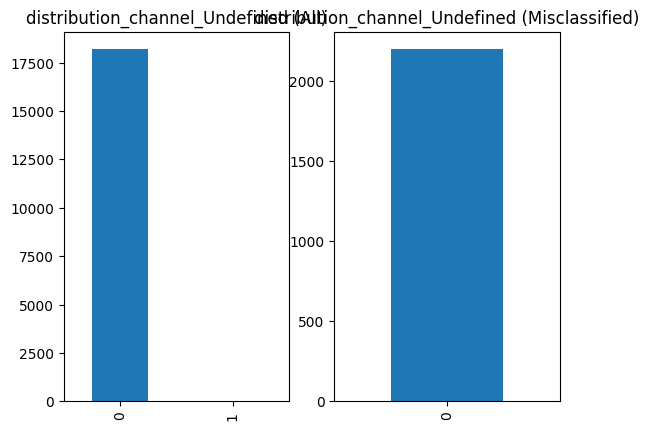

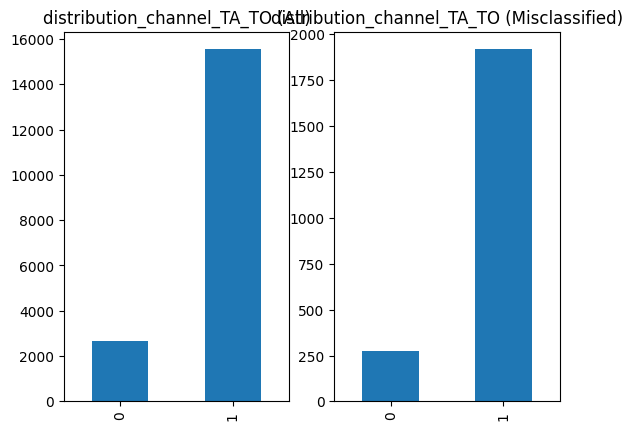

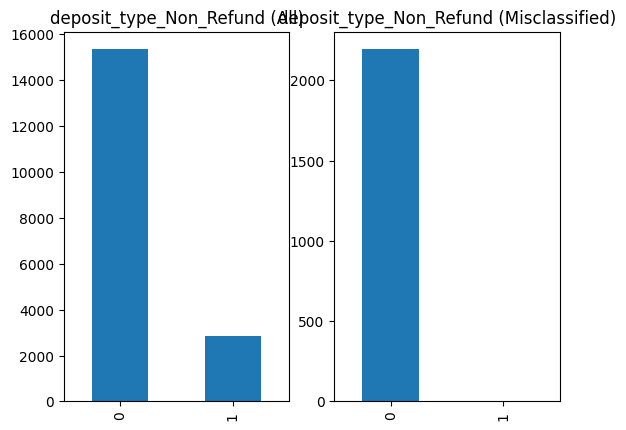

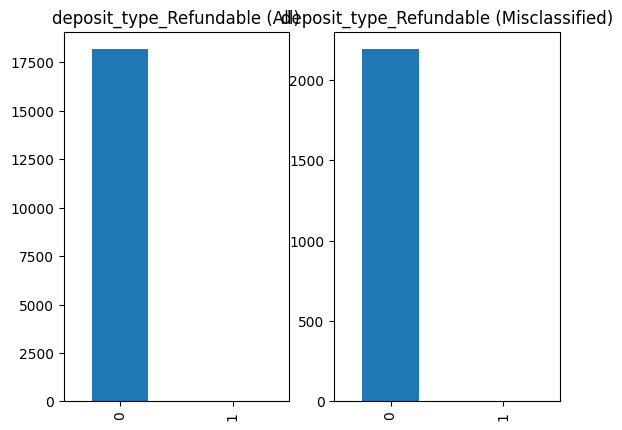

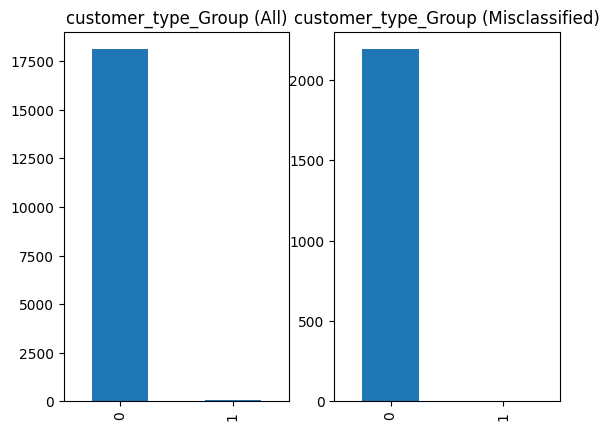

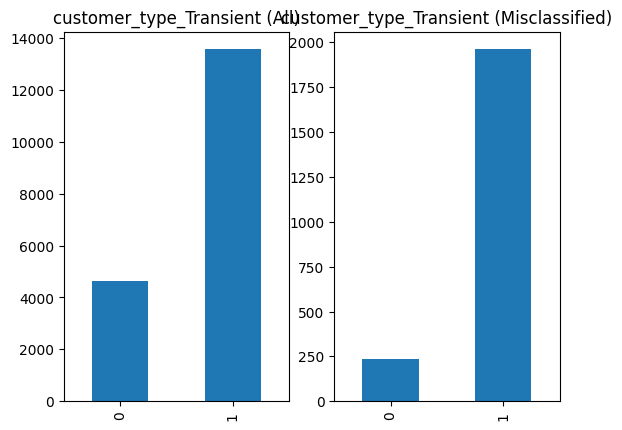

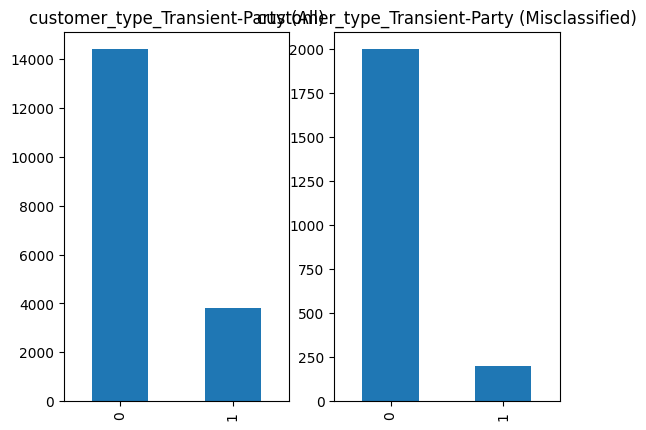

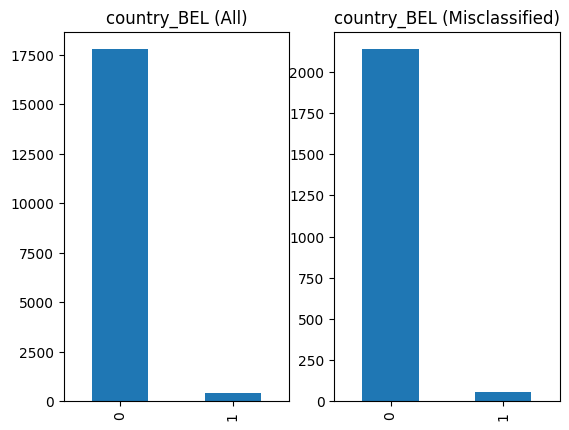

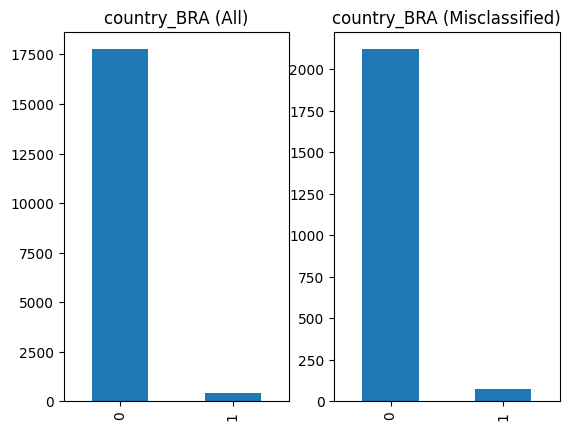

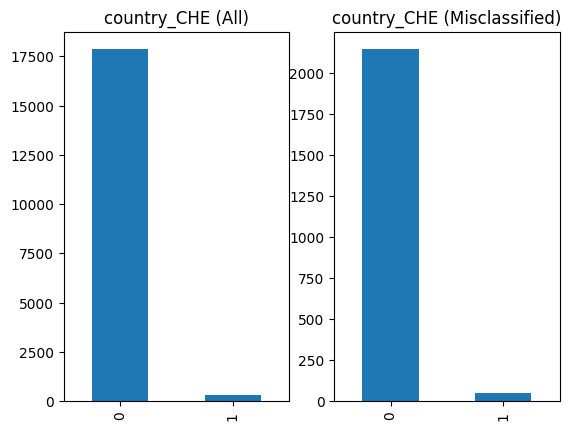

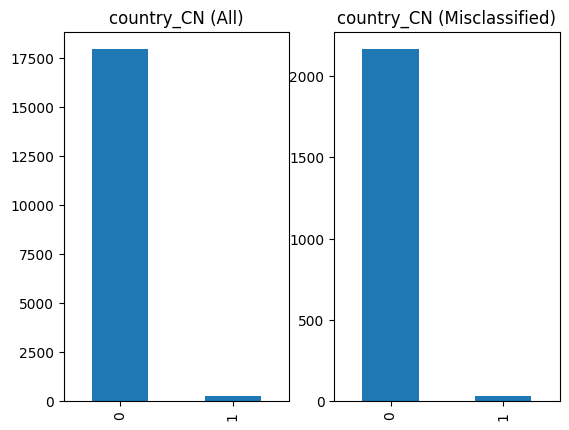

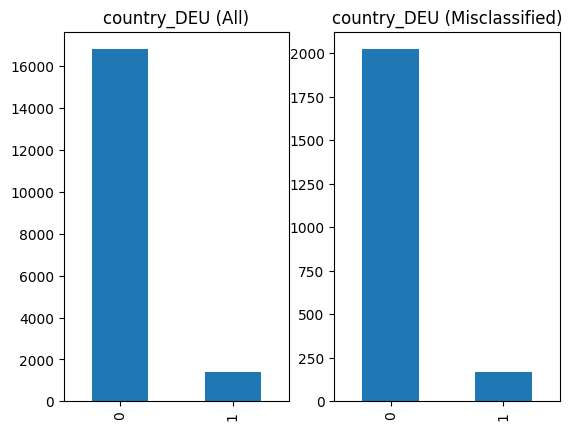

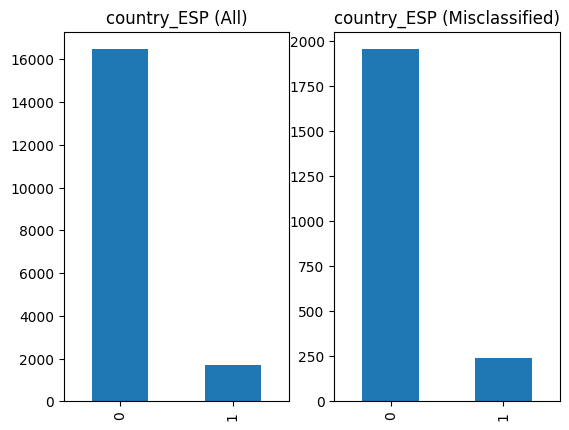

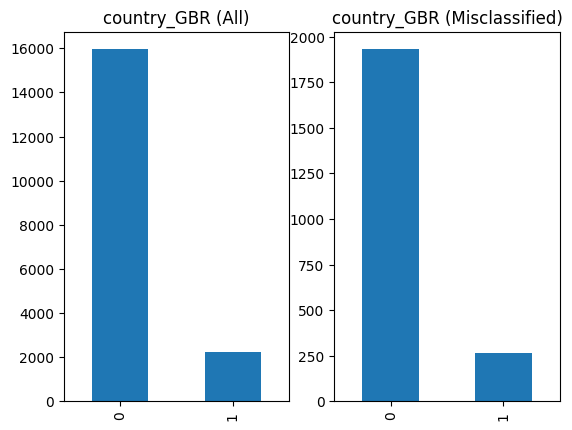

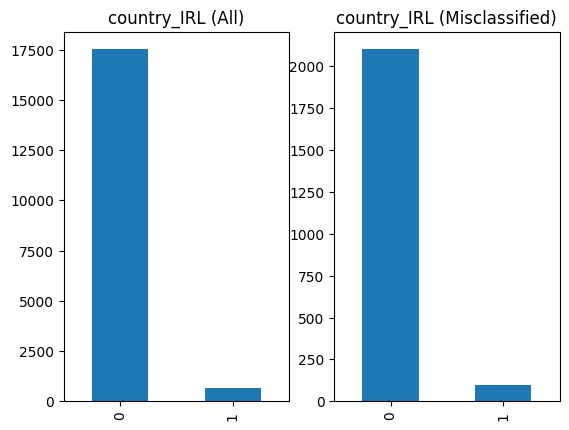

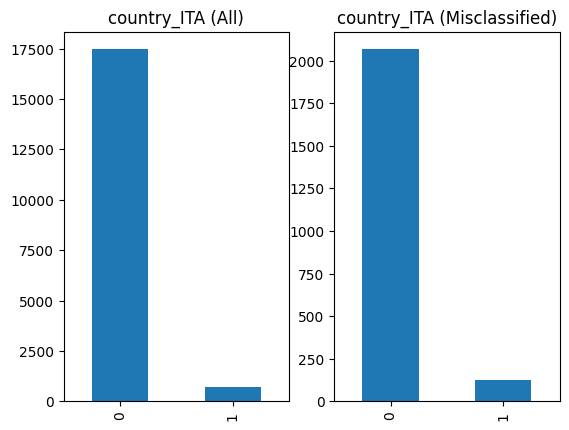

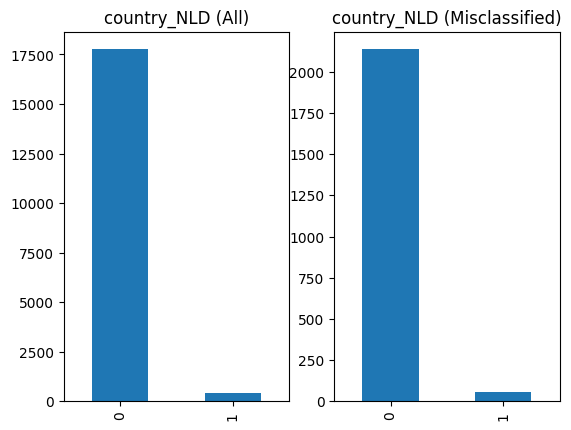

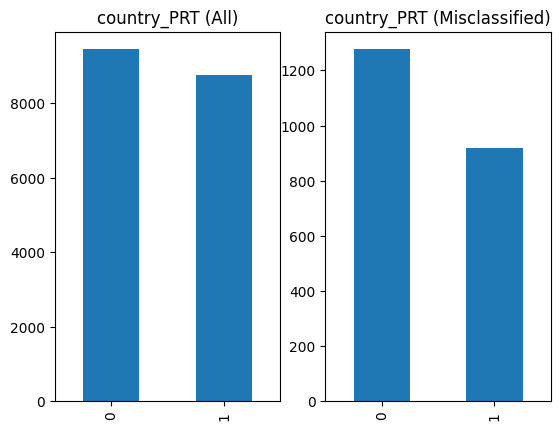

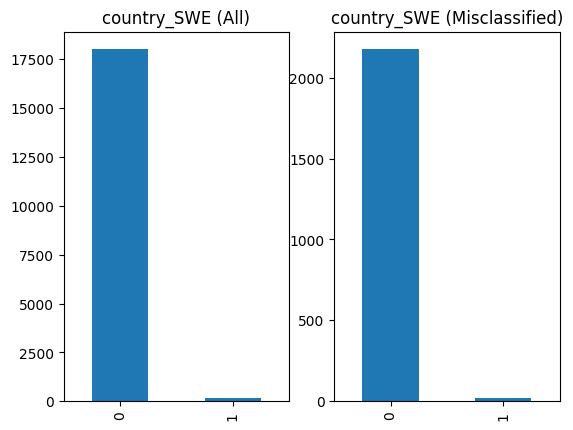

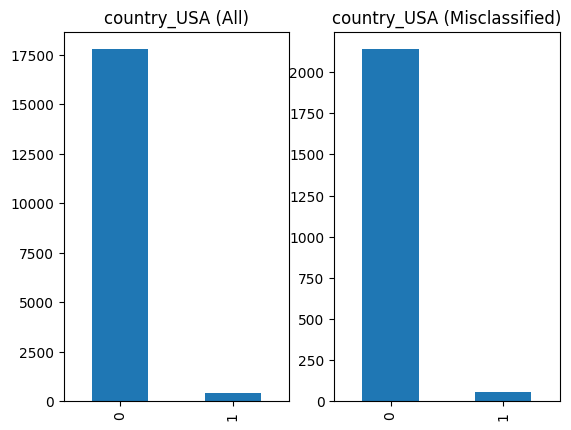

In [ ]:
import matplotlib.pyplot as plt
for column in encoded_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  df_with_predictions[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (All)', ax=ax1)
  misclassified_df[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (Misclassified)', ax=ax2)

# **Gradient Boosting**



> Als nächstes Modell testen wir das additive Ensemble-Modell 'Gradient Boosting'. Hierbei werden schwächere Lernmodelle, i. d. R. Entscheindungsbäume schrittweise hinzugefügt und somit zu einem starken Lernmodell kombiniert. Im Gegensatz zum Random Forest werden beim Gradient Boosting gezielt schwache, fehlerhafte Lernmodelle genutzt, um diese zu kombinieren und Schwachstellen auszugleichen. Schritt für Schritt wird ein neues schwaches Lernmodell hinzugezogen und die Fehler korrigiert.

https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting




> Für Gradient Boosting benötigen wir den GradientBoostingClassifier. Der Parameter 'n_estimators' des Classifiers beschreibt dabei die Anzahl an schwächeren Lernmodellen, die sukzessive ins Trainingsmodell mitaufgenommen werden. DIe 'learning_rate' gibt den Hyperparameter sn, durch den Overfitting vermieden werden soll, der also das gesamte Modell reguliert. die Größe des decision trees wird durch 'max_depth' definiert. Über den Hyperparameter 'random_state' wird bestimmt, dass train- und test-Daten immer die selben Werte annehmen und somit das Machine Learning Modell immer die gleichen Ergebnisse liefert.



> Um GradientBossting als Classification durchführen zu können, müssen wir erstmal den gradientBoostingClassifier aus sklearn.ensemble importieren.



In [ ]:
from numpy import loadtxt
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

> Wir definieren die Parameter n_estimators, learning_rate und max_depth entsprechend der Python-Dokumentation und bestimmen einen random_state, um immer gleiche Ergebnisse mit Training und Evaluation zu erhalten.

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)

> Dann kann das Modell trainiert werden.

In [ ]:
gb.fit(X_train_scaled, y_train_scaled)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

> Die Evaluation des trainierten Modells zeigt, dass die Accuracy bei 82% liegt, der f1-Score liegt knapp darunter, bei %.

In [ ]:
evaluate(gb, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     10670
           1       0.84      0.68      0.75      7513

    accuracy                           0.81     18183
   macro avg       0.82      0.80      0.80     18183
weighted avg       0.82      0.81      0.81     18183



## **Hyperparameter Tuning**

> Wir versuchen nun derneut durch Hyperparameter Tuning das Modell zu verbessern. Die ausgewählten Parameter speichern wir jeweils in einem Grid, das wir dann in die RandomizedSearchCV übergeben, die zufällig verschiedene Kombinationen der Parameter durchtestet und gleichzeitig cross-validation durchführt.

In [ ]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': loguniform(0.001, 1),
    'n_estimators': [50, 100, 200, 220, 250],
    'subsample': [0.3, 0.5, 0.8, 1.0],
    'max_depth': [3, 5, 7, 11],
    'min_samples_split': [1, 2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

> Wir übergeben den Classifier, das erstellte Grid, einen bestimmten random_state und die Anzahl an Interationen, die das Modell verschiedene Kombinationen austesten soll, in die Search-Funktion, hier `RandomizedSearchCV().`

In [ ]:
ht_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, random_state=42, n_iter=10)

> Dieses neue Modell können wir nun ebenfalls auf die Trainingsdaten anpassen. Das Hyperparameter Tuning dauert 50 min, weshalb wir nach ein paar Anpassungen des Codes, das ausgegebene Ergebnis akzeptieren und nicht durch weitere Versuchen oder gar mit GridSearchSV das Modell laufen lassen.

In [ ]:
ht_gb.fit(X_train_scaled, y_train_scaled)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e9fc567f130>,
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 5, 7, 11],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [1, 2, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 220,
                                                         250],
                                        'subsample': [0.3, 0.5, 0.8, 1.0]},
                   random_state=42)

> Anschliesend interessiert uns, was die optimalen Parameter für die bestmögliche Kombination sind.

In [ ]:
ht_gb.best_params_

{'learning_rate': 0.31592553907017473,
 'loss': 'log_loss',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100,
 'subsample': 1.0}

> Auch das optimierte Modell können wir evaluieren und sehen, dass sich das Ergebnis noch ein bisschen verbessert hat, im Vergleich zu ohne Hyperparameter Tuning.

In [ ]:
evaluate(ht_gb, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     10670
           1       0.86      0.77      0.82      7513

    accuracy                           0.86     18183
   macro avg       0.86      0.84      0.85     18183
weighted avg       0.86      0.86      0.85     18183



# **XGBoost**

> Das XGBoost-Modell ist eine spezielle Implementierung der Ensemble-Methode 'GradientBoosting', die sehr viele Etnscheidungsbäume trainiert, schrittweise miteinander kombiniert und durch Fehlerbeseitung der hinzugefügten Modelle optimiert. XGBoost steht dabei für 'Extreme Gradient Boosting', das optimierte Trainingsalgorithmen verwendet, Gradientenabstieg und Regularisierungstechniken kombiniert, um Overfitting zu reduzieren und ein leistungsstarkes, effizientes Gradient Bossting Modell zu bieten. Es eignet sich besonders für große Datenmengen.
> XGBoost performt meist sehr gut und erzielt eine hohe Accuracy.

> Für die Implementierung importieren wir den XGBClassifier aus dem package 'xgboost' und definieren die Parameter 'objective', 'alpha' (Hyperparameter für die Stärke der L1-Regularisierung) und lambda (L2-Regularisierung). Danach kann das Modell trainiert und als Entscheidungsbaum geplottet werden.

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

params = {
    'objective': 'binary:logistic',
    'alpha': 0.5,    # L1-Regularisierung
    'lambda': 0.5    # L2-Regularisierung
}

xgb = XGBClassifier(**params)
xgb.fit(X_train_scaled, y_train_scaled)

plot_tree(xgb)
plt.show()

> Wir können uns nun zu dem Modell die Evaluationswerte Accuracy und f1-score anschauen. XGBoost performt im Vergleich zu GradientBoosting deutlich besser.

In [ ]:
evaluate(xgb, X_test_scaled, y_test_scaled)

## **Hyperparameter Tuning**

> Wir versuchen nun durch Hyperparameter Tuning das Modell nochmals zu verbessern. Dafür definieren wir eine potentiell gute Auswahl an Parametern (auf Basis von Recherche) und geben sie in ein Grid. Dieses Grid kann erneut mit dem Classifier und der Spezifikation der cross-validation in die RandomizedSearchCV übergeben und das Modell auf die skalierten Trainingsdaten gefittet werden.
> Schritt für Schritt passen wir die Parameter an, da sich das Ergebnis im Verlgeich zu vor Hyperparameter Tuning leicht verschlechtert hat. Dies kann zwar auch an der Kombination mit cross-validation liegen (da nochmal mit neuen Validierungs-Daten verglichen wird, die ggf. schlechter vom Modell abgebildet werden können, der Generalization Error des Models wird allerdings durch cross-validation nicht erhöht).

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 6, 10],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10, 100],
    'lambda' : [1,0.5],
    'alpha': [0.5,0],
    'seed': [42]
}

ht_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5)
ht_xgb.fit(X_train_scaled, y_train_scaled)

> Wir können uns nun die besten Parameter ausgeben lassen.

In [ ]:
ht_xgb.best_params_

> Auch hier evaluieren wir wieder die Ergebnisse nach Hyperparameter Tuning, sehen allerdings, dass das Ergebnis nicht besser ist, als die des Random Forest.

In [ ]:
evaluate(ht_xgb, X_test_scaled, y_test_scaled)

# **Recap der Classification-Modelle**

The dataset has the following columns:

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)


Überblick Werte (F1(1), Accuracy) mit Tabelle

Random Forest als bestes Modell (Empfehlung) + kurzer Recap zur Error Analysis

Wahrscheinlichkeit von ... bei der Vorhersage einer Stornierung

Forschungsfrage aufgreifen & beantworten